# Perkenalan

___
Milestone 2

Nama: Fadhiil Dzaki Mulyana<br>
Batch: HCK-22

Notebook ini akan digunakan untuk melakukan analisis  mengenai hal hal yang berhubungan kecenderungan orang untuk melakukan deposit dan membangun model machine learnning yang dapat memprediksi orang-orang yang cenderung berdeposit.
___

**Link App:**<br>
[Apartment Price Prediction](https://huggingface.co/spaces/fadhiil23/HCK22_Property_Price_Prediction)

**Dataset Description:**<br>
Source: [Kaggle | Sao Paulo Real Estate](https://www.kaggle.com/datasets/argonalyst/sao-paulo-real-estate-sale-rent-april-2019)

Dataset merupakan representasi dari harga properti pada bulan April 2019. Dataset ini berisi sekitar 13.000 apartemen dijual dan disewakan di kota São Paulo, Brazil. Data berasal dari berbagai sumber, khususnya situs web penjualan real estate.

| Nama Kolom        | Deskripsi                                                                                         |
|-------------------|---------------------------------------------------------------------------------------------------|
| **Price**         | Harga akhir yang diiklankan dalam mata uang Brazilian Real (R$).                                  |
| **Condo**         | Biaya bulanan untuk kondominium, dengan nilai unknown ditandai sebagai nol.                       |
| **Size**          | Luas properti dalam meter persegi (m²), hanya mencakup area pribadi.                              |
| **Rooms**         | Jumlah kamar tidur di apartemen.                                                                  |
| **Toilets**       | Jumlah kamar mandi (semua jenis kamar mandi).                                                     |
| **Suites**        | Jumlah kamar tidur yang memiliki kamar mandi pribadi (ensuite).                                   |
| **Parking**       | Jumlah tempat parkir yang tersedia untuk apartemen.                                               |
| **Elevator**      | Nilai biner: 1 jika ada lift di gedung, 0 jika tidak ada.                                         |
| **Furnished**     | Nilai biner: 1 jika apartemen dalam kondisi berperabotan lengkap, 0 jika tidak.                   |
| **Swimming Pool** | Nilai biner: 1 jika apartemen memiliki kolam renang, 0 jika tidak ada.                            |
| **New**           | Nilai biner: 1 jika properti tergolong baru, 0 jika tidak.                                        |
| **District**      | Nama wilayah atau lingkungan tempat properti berada, contoh: Itaim Bibi/São Paulo.                |
| **Negotiation Type** | Jenis negosiasi properti, apakah untuk dijual atau disewakan.                                  |
| **Property Type** | Jenis properti, misalnya apartemen, rumah, dll.                                                   |
| **Latitude**      | Lokasi geografis (garis lintang) properti.                                                        |
| **Longitude**     | Lokasi geografis (garis bujur) properti.                                                          |


**Background:**<br>
Sao Paulo, Brazil, adalah salah satu kota terbesar dan pusat ekonomi utama di Amerika Selatan. Sebagai kota metropolitan yang terus berkembang, kebutuhan akan hunian seperti apartemen semakin meningkat, terutama di daerah pusat bisnis dan kawasan populer. Bagi calon pembeli dan investor, estimasi harga apartemen yang akurat menjadi faktor penting dalam pengambilan keputusan. Dengan demikian, model prediksi harga apartemen yang andal dapat membantu calon pembeli dan pelaku bisnis properti memahami tren harga dan membuat keputusan yang lebih terinformasi.

**Problem Statement:**<br>
Membangun model regresi untuk memprediksi estimasi harga jual/sewa apartment di Sao Paulo, Brazil dengan error RMSE di bawah R$5.000. Model akan dibangun dalam 3 bulan menggunakan data apartemen yang mencakup faktor signifikan seperti luas, jumlah kamar tidur, dan lokasi, untuk membantu calon pembeli mendapatkan estimasi harga yang akurat.

**Sumber Informasi:**<br>
- [The Rio Times](https://www.riotimesonline.com/real-estate-trends-in-sao-paulo-a-study-of-rising-values/)
- [Benoit Properties International](https://www.benoitproperties.com/destinations/sao-paulo/)
- [The Latinvestor](https://thelatinvestor.com/blogs/news/sao-paulo-property)

**Problem Breakdown:**<br>
1. Bagaimana Deskriptif Statistik dataset?
2. Fitur apa saja yang mempengaruhi harga properti?
3. Bagaimana distribusi harga apartemen? baik itu yang disewakan maupun yang dijual.
4. Dimana saja pusat perkumpulan apartemen yang banyak dijual?
5. Area apa saja yang memiliki median harga apartemen tertinggi?
6. Bagaimana perbandingan harga apartemen yang Furnished dan yang tidak?
7. Bagaiaman perbandingan harga apartemen yang Baru dan yang bekas?

# Libraries

## Library

In [1]:
# data manipulation
import pandas as pd
import numpy as np
from unidecode import unidecode

# map
import geopandas as gpd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# prep
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Stats
from scipy.stats import spearmanr, kendalltau, mannwhitneyu, f_oneway

# model
# Importing required libraries and models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost as xgb

# Evaluasi
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

# saving
import pickle

# ignore warning
import warnings
warnings.filterwarnings('ignore')

## Function

In [2]:
# OVERALL
# overview
def check_overview(df):
    '''
    df_overview adalah fungsi yang digunakan untuk melihat informasi seputar dataset.

    Argumen:
    df = dataset yang digunakan.

    Output:
    Informasi overall dataset, missing value, duplicated value dan jumlah unique value setiap kolom.
    '''
    # df overview
    print(df.info())

    # cek missing value
    print(f"\nmissing values: {round(((df.isna().sum().sum())/len(df))*100, 2)}% \n{df.isna().sum()[df.isna().sum()>0]}")

    # cek duplicated value
    print(f"\nduplicated values: {round(((df.duplicated().sum())/len(df))*100,2)}% \n{df.duplicated().sum()}\n")

    # cek nama kolom & jumlah unique value
    for col in df:
        print(f'{col}-#nunique: {df[col].nunique()}')

# fungsi cek deskriptif stats
def check_deskriptif(df, kolom):
    '''
    Fungsi ini digunakan untuk mengetahui statistik deskriptif.

    Argumen:
    - df = DataFrame
    - kolom = List dari kolom numerik

    Return:
    - DataFrame yang berisi deskriptif statistik data.
    '''
    # deskriptif stats
    deskriptif = df[kolom].describe().T

    # List untuk menyimpan nilai
    skewness_values = []
    jenis_skewness = []

    # Loop untuk menghitung skewness dan kurtosis setiap kolom
    for i in kolom:
        # Menghitung skewness
        skew = df[i].skew()
        skewness_values.append(skew)
        
        # Menentukan jenis skewness
        if -0.5 <= skew <= 0.5:
            jenis_skewness.append('normal')
        else:
            jenis_skewness.append('skewed')

    # Membuat kolom baru dalam deskriptif
    deskriptif['skewness'] = skewness_values
    deskriptif['jenis_skewness'] = jenis_skewness

    return deskriptif

# fungsi cek outlier
def check_outlier(df, kolom):
    '''
    argumen:
    df = dataframe
    kolom = kolom numerik [list]
    multiplier = pengkali dalam metode IQR (1.5 / 3)
    '''
    # mengecek deskriptif stats
    deskriptif = check_deskriptif(df,kolom)

    # batas atas
    upper_fence = []
    #batas bawah
    lower_fence = []
    # persentase outlier
    percent_outlier = []

    # looping untuk mengisi list kosong
    for i in kolom:
        # bentuk distribusi
        bentuk_dist = deskriptif['jenis_skewness'][i]
        # besar skewness
        besar_skew = deskriptif['skewness'][i]

        # jika bentuk distribusi skew
        if bentuk_dist == 'skewed':
            # jika outlier kecil
            if -1 < besar_skew < 1:
                # mencari Q1,Q2 dan IQR
                Q3 = df[i].quantile(0.75)
                Q1 = df[i].quantile(0.25)
                IQR = Q3-Q1
                
                # menghitung boundaries
                batas_bawah = Q1-1.5*IQR
                batas_atas = Q3+1.5*IQR
            # jika outlier extreeme
            else:
                # mencari Q1,Q2 dan IQR
                Q3 = df[i].quantile(0.75)
                Q1 = df[i].quantile(0.25)
                IQR = Q3-Q1
                # menghitung boundaries
                batas_bawah = Q1-3*IQR
                batas_atas = Q3+3*IQR

        # jika bentuk distribusi normal
        else:
            # rata2 dan st. deviasi
            avg = df[i].mean()
            std = df[i].std()

            # boundaries
            batas_atas = avg + 3*std
            batas_bawah = avg - 3*std

        # menghitung persentase outlier
        persentase_out = ((len(df[df[i] > batas_atas]) / len(df) * 100) + (len(df[df[i] < batas_bawah]) / len(df) * 100))
        persentase_out = round(persentase_out,2)

        # boundaries adn percentage add
        lower_fence.append(batas_bawah)
        upper_fence.append(batas_atas)
        percent_outlier.append(persentase_out)

    # convert to df
    outlier = pd.DataFrame({
        'batas_atas': upper_fence,
        'batas_bawah': lower_fence,
        'persentase' : percent_outlier},
        index=kolom
        )
    # mengembalikan outlier
    return outlier

# STATS
# fungsi uji anova
def uji_anova(df, group_col, value_col):
    '''
    Fungsi ini digunakan untuk melakukan uji ANOVA (Analysis of Variance).

    Argumen:
    - df = DataFrame
    - group_col = Nama kolom yang berisi grup/kategori
    - value_col = Nama kolom yang berisi nilai yang akan dianalisis
    
    output:
    - F-statistic, p-value, eta squared dari uji ANOVA
    '''
    # define unique value dari kolom kategorik
    unique = df[group_col].unique()
    
    # Mengelompokkan data berdasarkan kategori dalam group_col
    groups = [df[df[group_col] == i][value_col] for i in unique]
    
    # Melakukan uji ANOVA
    F_stat, p_value = f_oneway(*groups)

    # Menghitung SS_between
    grand_mean = df[value_col].mean()
    ss_between = sum([len(group) * ((group.mean() - grand_mean) ** 2) for group in groups])
    
    # Menghitung SS_total
    ss_total = sum((df[value_col] - grand_mean) ** 2)
    
    # Menghitung eta squared
    eta_squared = ss_between / ss_total
    
    # Tampilkan hasil
    print(f'F-statistic: {F_stat}')
    print(f'p-value: {p_value}')
    print(f'eta squared: {eta_squared}')

    # interpretasi pvalue
    if p_value < 0.05:
        print(f'H0 berhasil ditolak: terdapat perbedaan yang signifikan pada {value_col} terhadap {group_col}')
            # interpretasi korelasi
        if eta_squared < 0.01:
            print("Small effect size\n")
        elif eta_squared < 0.06:
            print("Medium effect size\n")
        else:
            print("Large effect size\n")
    else:
        print(f'H0 gagal ditolak: TIDAK terdapat perbedaan yang signifikan pada {value_col} terhadap {group_col}\n')
    
    return F_stat, p_value, eta_squared

# uji mann whitney
def uji_mannwhitney(df,kolom_1,kolom_2):
    '''
    argumen:
    kolom_1 = kolom yang ingin dibandingkan
    kolom_2 = kolom pembanding
    '''
    # list unique value
    unique = df[kolom_1].unique()

    # filtering per unique value
    df_a = df.loc[df[kolom_1] == unique[0], kolom_2]
    df_b = df.loc[df[kolom_1] == unique[1], kolom_2]

    # Mann-Whitney U Test
    stat, p_value = mannwhitneyu(df_a, df_b)
    print(f"U-Statistic: {stat}, P-Value: {p_value}")

    # hasil
    print(f'tstat = {stat}')
    print(f'pvalue = {p_value}\n')

    # kondisi tolak H0
    if p_value < 0.05:
        print(f'H0 berhasil ditolak: terdapat perbedaan yang signifikan pada {kolom_1} dan {kolom_2}\n')
    # kondisi gagal tolak H0
    else:
        print(f'H0 gagal ditolak: TIDAK terdapat perbedaan yang signifikan pada {kolom_1} dan {kolom_2}\n')
    
    # mengembalikan stat dan p value
    return stat,p_value

# uji spearman
def uji_spearman(df,kolom_1,kolom_2):
    '''
    Fungsi ini digunakan ketika igni melakukan uji korelasi dengan metode spearman (distribusi tidak normal)

    Argumen:
    - df = dataset
    - kolom_1 = kolom pertama yang ingin diuji korelasi
    - kolom_2 = kolom kedua yang ingin diuji korelasi
    '''
    # uji spearman
    corr_coef, p_value = spearmanr(df[kolom_1],df[kolom_2])

    # hasil
    print(f'koefisien corr = {corr_coef}')
    print(f'pvalue = {p_value}\n')

    # kondisi tolak H0
    if p_value < 0.05:
        print(f'H0 berhasil ditolak: {kolom_1} berkorelasi dengan {kolom_2}\n')
    # kondisi gagal tolak H0
    else:
        print(f'H0 gagal ditolak {kolom_1}  TIDAK berkorelasi dengan {kolom_2}\n')
    
    return corr_coef, p_value

# fungsi uji kendall
def uji_kendall(df,kolom_1, kolom_2):
    '''
    argumen:
    df = dataset
    kolom_1 = kolom fitur
    kolom_2 = kolom target
    '''    
    #uji stats
    stat, p_value = kendalltau(df[kolom_1],df[kolom_2])

    # hasil
    print(f'koefisien corr = {stat}')
    print(f'pvalue = {p_value}\n')

    # kondisi tolak H0
    if p_value < 0.05:
        print(f'H0 berhasil ditolak: {kolom_1} berkorelasi dengan {kolom_2}\n')
    # kondisi gagal tolak H0
    else:
        print(f'H0 gagal ditolak: {kolom_1} TIDAK berkorelasi dengan {kolom_2}\n')

    return stat, p_value

# VIZ
# fungsi histogram
def plot_histogram(df,kolom, bin='auto'):
    '''
    fungsi ini digunakan untuk membuat grafik histogram.

    Argumen:
    - df = dataset
    - kolom = kolom yang ingin di-plot (numerik)
    - bin = besar bins yang diinginkan
    '''
    # loop membangun histogram sebanyak jumlah kolom
    for idx,i in enumerate(kolom):
        # membuat beberapa plot dalam plot
        plt.subplot(len(kolom),len(kolom),idx+1)

        # plot histogram
        ax=sns.histplot(df[i], kde=True, bins=bin)

        # add gridline
        plt.grid(True, linestyle = '--', color = 'grey', alpha = 0.3)

        # add title
        plt.title(f'Distribution of {i}')

    # show plot
    plt.tight_layout()
    plt.show()

# fungsi countplot
def plot_countplot(df,kolom,row=None, col=None):
    '''
    Fungsi in digunaka untuk membuat countplot untuk data-data kategorik

    Argumen:
    - df = dataset
    - kolom = kolom-kolom yang ingin dibangun countplot
    - row = jumlah baris
    - col = jumlah kolom
    '''
    # define jumlah baris dan kolom
    cols = col
    rows = row

    # loop countplot
    for idx,i in enumerate(kolom):
        # order dari yang terbanyak
        urut = df[i].value_counts(ascending=False).index
        
        # create subplot
        plt.subplot(rows,cols,idx+1)
        
        # countplot
        ax=sns.countplot(x=df[i],order=urut, palette='Set3')
        
        # add gridline
        plt.grid(True, linestyle = '--', alpha = 0.3)
        # add title
        plt.title(i)

        # kondisi unique value lebih dari 4
        if len(df[i].unique())> 4:
            # rotate x_tick
            plt.xticks(rotation=90)

        # calculate tinggi
        total = float(len(df[i]))
        # loop add anotation
        for p in ax.patches:
            # calculate percentage
            percentage = '{:.1f}%'.format(100 * p.get_height() / total)
            # get titik x & titik y
            x = p.get_x() + p.get_width() / 2 - 0.05
            y = p.get_height()
            # add annotate
            ax.annotate(percentage, (x, y), ha='center', va='bottom')

    # show plot
    plt.tight_layout()
    plt.show()

# fungsi boxplot
def plot_boxplot(df,kolom):
    '''
    Fungsi ini digunakan untuk membangun box plot

    Argumen:
    - df = dataset
    - kolom = kolom numerik
    '''
    # loop boxplot sebanyak kolom
    for i in range(0,len(kolom)):
        # create subplot
        plt.subplot(1,len(kolom),i+1)
        
        # boxplot
        sns.boxplot(y=df[kolom[i]])
        
        # add gridline
        plt.grid(True, linestyle = '--', color = 'grey', alpha = 0.3)
        # add title
        plt.title(kolom[i])
        # delete y label
        plt.ylabel('')

    # show plot
    plt.tight_layout()
    plt.show()

# EVALUASI
# evaluasi
def performance_report(all_reports, crossvals, y_train, y_pred_train, y_test, y_pred_test, name):
    '''
    Fungsi ini digunakan untuk melihat RMSE dari setiap model yang digunakan.

    Argumen:
    - all_reports = dictionary yang memuat rmse
    - crossvals = hasil crosval
    - y_train = train target
    - y_pred_train = prediksi train
    - y_test = test target
    - y_pred_test = prediksi test
    - name = nama kolom
    '''
    # list evaluasi train, cv dan test
    score_reports = {
      'train' : root_mean_squared_error(y_train, y_pred_train),
      'mean - cv' : crossvals.mean(),
      'std - cv': crossvals.std(),
      'test' : root_mean_squared_error(y_test, y_pred_test),
    }
    
    # create new key
    all_reports[name] = score_reports
    
    # mengembalikan all_report
    return all_reports

# Data Loading

In [3]:
# import data
df = pd.read_csv('sao-paulo-properties-april-2019.csv')

# show all column
pd.set_option('display.max_columns', None)

# show df
df.sample(5)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
2149,2250,470,51,2,1,0,1,0,0,1,0,Barra Funda/São Paulo,rent,apartment,0.000000,0.000000
11387,199000,60,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,sale,apartment,-23.543523,-46.484630
11574,330000,320,60,2,2,1,1,1,0,1,0,Vila Matilde/São Paulo,sale,apartment,-23.529188,-46.519140
10204,1000,830,58,2,2,1,1,1,1,1,0,Pirituba/São Paulo,rent,apartment,-23.482355,-46.742050
1006,2300,658,53,2,2,1,2,1,0,1,0,Cursino/São Paulo,rent,apartment,-23.605497,-46.625622


In [4]:
# Overall
check_overview(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13640 non-null  int64  
 1   Condo             13640 non-null  int64  
 2   Size              13640 non-null  int64  
 3   Rooms             13640 non-null  int64  
 4   Toilets           13640 non-null  int64  
 5   Suites            13640 non-null  int64  
 6   Parking           13640 non-null  int64  
 7   Elevator          13640 non-null  int64  
 8   Furnished         13640 non-null  int64  
 9   Swimming Pool     13640 non-null  int64  
 10  New               13640 non-null  int64  
 11  District          13640 non-null  object 
 12  Negotiation Type  13640 non-null  object 
 13  Property Type     13640 non-null  object 
 14  Latitude          13640 non-null  float64
 15  Longitude         13640 non-null  float64
dtypes: float64(2), int64(11), object(3)
memo

**Dataset Overview:**
- Dataset memiliki 13640 baris dan 16 kolom.
    - Kategorik: 'Elevator', 'Furnished', 'Swimming Pool', 'New', 'District', 'Negotiation Type', 'Property Type', 'Latitude', 'Longitude'.
    - Numerik: 'Price', 'Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking'.
- Penamaan kolom pada dataset konsisten dan tidak memiliki whitespace.
- Beberapa kolom memiliki kesalahan tipe data:
    - 'Price', 'Condo','Size': seharusnya bertipe float untuk memastikan harga yang lebih presisi.
- Pada setiap akhir value pada 'District' Terdapat kata "/São Paulo" yang tidak memberikan informasi tambahan apapun. Untuk memperjelas nama district, kata tersetbut akan dihapus.
- Value pada 'District' memiliki karakter-karakter yang sulit ditelusuri (Ó, í, á, ã, dll). Untuk mempermudah penelusuran, akan diubah menjadi huruf biasa (ASCII).

**Missing Values:**
- Tidak terdeteksi adanya missing value.
- Berdasarkan deskripsi data, terdapat non-standard missing value pada kolom 'Condo', yaitu pada value "0" yang menandakan nilai yang tidak diketahui.

**Duplicated Values:**
- Terdapat 2.34% atau 319 duplicate values, tetapi karena data tidak memilik primary key dan juga sangat memungkinkan untuk 2 unit berada dalam satu gedung apartment yans sama (latititude dan longitude sama). Sehingga memungkinkan pula unit unit memiliki spesifikasi, harga jual, bahkan agen properti yang sama.

**Cardinality:**
- Kolom-kolom yang numerik terlihat normal.
- Beberapa kolom kategorik memiliki terlalu banyak/sedikit unique value seperti:
    - 'Longitude' (8451 unique value) dan 'Latitude' (8405 unique value): kemungkinan tidak akan dipakai dalam modeling karena sudah diwakilkan oleh 'District' yang juga berisi informasi tentang lokasi.
    - 'District' (96 unique value): Mengelompokkan ulang sesuai dengan [pembagian wilayahnya](https://wikitravel.org/en/S%C3%A3o_Paulo) (West, Downtown, Norteast, etc.)
    -'Property Type' (1 unique value): kolom ini hanya memiliki 1 unique value, sehingga tidak memberikan informasi tambahan apapun. 'Property Type' tidak akan digunakan.

In [5]:
# save
df_org = df.copy()

In [6]:
# load
df = df.copy()

# Feature Engineering 1

## Dtype Manipulation

'Price', 'Condo' dan 'Size' memiliki tipe data integer, yang mana seharusnya bertipe float untuk memastikan harga yang lebih presisi. Untuk mengatasi hal tersebut, akan dilakukan pergantian menjadi float pada kolom-kolom tersebut.

In [7]:
# define kolom float
desimal = ['Price', 'Condo','Size']

# loop convert to float
for i in desimal:
    # convert to float
    df[i] = df[i].astype('float')
    
    # check
    print (i,':',df[i].dtype)

Price : float64
Condo : float64
Size : float64


Dtype 'Price', 'Condo' dan 'Size' telah berhasil diubah ke float.

In [8]:
# save
df_dtype_mnpl = df.copy()

In [9]:
# load
df = df_dtype_mnpl.copy()

## Value Manipulation

Pada setiap akhir value pada 'District' Terdapat kata "/São Paulo" yang tidak memberikan informasi tambahan apapun. Untuk memperjelas nama district, kata-kata tersetbut akan dihapus.

In [10]:
# delete "/São Paulo" pada 'District
df['District'] = df['District'].replace({'/São Paulo':''},regex=True)
# check
df.District.unique()

array(['Artur Alvim', 'Belém', 'Cangaíba', 'Carrão', 'Cidade Líder',
       'Cidade Tiradentes', 'Ermelino Matarazzo', 'Iguatemi',
       'Itaim Paulista', 'Itaquera', 'Jardim Helena', 'José Bonifácio',
       'Lajeado', 'Parque do Carmo', 'Penha', 'Ponte Rasa', 'Sapopemba',
       'São Lucas', 'São Mateus', 'São Miguel', 'São Rafael', 'Tatuapé',
       'Vila Curuçá', 'Vila Formosa', 'Vila Jacuí', 'Vila Matilde',
       'Vila Prudente', 'Cambuci', 'Campo Belo', 'Campo Grande',
       'Campo Limpo', 'Capão Redondo', 'Cidade Ademar', 'Cidade Dutra',
       'Cursino', 'Grajaú', 'Ipiranga', 'Itaim Bibi', 'Jabaquara',
       'Jardim Ângela', 'Jardim Paulista', 'Moema', 'Morumbi', 'Pedreira',
       'Sacomã', 'Santo Amaro', 'Saúde', 'Socorro', 'Vila Andrade',
       'Vila Mariana', 'Vila Sônia', 'Alto de Pinheiros', 'Anhanguera',
       'Brasilândia', 'Butantã', 'Cachoeirinha', 'Freguesia do Ó',
       'Jaguaré', 'Jaraguá', 'Lapa', 'Limão', 'Perdizes', 'Pinheiros',
       'Pirituba', 'Raposo

'District' sudah berisi nama-nama district saja, tetapi masih mengandung karakter-karakter unik. Selanjutnya akan dilakukan pengubahan menjadi bentuk biasa (ASCII).

In [11]:
# Menghapus diakritik
df['District'] = df['District'].apply(unidecode)

# check
df['District'].unique()

array(['Artur Alvim', 'Belem', 'Cangaiba', 'Carrao', 'Cidade Lider',
       'Cidade Tiradentes', 'Ermelino Matarazzo', 'Iguatemi',
       'Itaim Paulista', 'Itaquera', 'Jardim Helena', 'Jose Bonifacio',
       'Lajeado', 'Parque do Carmo', 'Penha', 'Ponte Rasa', 'Sapopemba',
       'Sao Lucas', 'Sao Mateus', 'Sao Miguel', 'Sao Rafael', 'Tatuape',
       'Vila Curuca', 'Vila Formosa', 'Vila Jacui', 'Vila Matilde',
       'Vila Prudente', 'Cambuci', 'Campo Belo', 'Campo Grande',
       'Campo Limpo', 'Capao Redondo', 'Cidade Ademar', 'Cidade Dutra',
       'Cursino', 'Grajau', 'Ipiranga', 'Itaim Bibi', 'Jabaquara',
       'Jardim Angela', 'Jardim Paulista', 'Moema', 'Morumbi', 'Pedreira',
       'Sacoma', 'Santo Amaro', 'Saude', 'Socorro', 'Vila Andrade',
       'Vila Mariana', 'Vila Sonia', 'Alto de Pinheiros', 'Anhanguera',
       'Brasilandia', 'Butanta', 'Cachoeirinha', 'Freguesia do O',
       'Jaguare', 'Jaragua', 'Lapa', 'Limao', 'Perdizes', 'Pinheiros',
       'Pirituba', 'Raposo

In [12]:
# save
df_value_mnpl = df.copy()

In [13]:
# load
df = df_value_mnpl.copy()

## Handling Cardinality

Handling cardinality kali in akan berfokus untuk menghandling cardinality pada kolom 'District', mengelompokkannya sesuai dengan [pembagian wilayahnya](https://wikitravel.org/en/S%C3%A3o_Paulo) (West, Downtown, Norteast, etc.)

In [14]:
# mengelompokkan district by zone
district_to_zone = {
    # Downtown
    'Bela Vista': 'Downtown', 'Bom Retiro': 'Downtown', 'Consolacao': 'Downtown', 'Pari': 'Downtown',
    'Liberdade': 'Downtown', 'Republica': 'Downtown', 'Santa Cecilia': 'Downtown', 'Se': 'Downtown', 'Bras': 'Downtown',

    # West
    'Alto de Pinheiros': 'West', 'Barra Funda': 'West', 'Butanta': 'West', 'Jaguare': 'West',
    'Lapa': 'West', 'Perdizes': 'West', 'Pinheiros': 'West', 'Rio Pequeno': 'West',
    'Vila Leopoldina': 'West', 'Vila Madalena': 'West',

    # South Central
    'Campo Belo': 'South Central', 'Ipiranga': 'South Central', 'Itaim Bibi': 'South Central',
    'Jabaquara': 'South Central', 'Jardim Paulista': 'South Central', 'Moema': 'South Central',
    'Morumbi': 'South Central', 'Santo Amaro': 'South Central', 'Saude': 'South Central',
    'Vila Mariana': 'South Central', 'Vila Olimpia': 'South Central', 'Brooklin': 'South Central',

    # Southeast
    'Agua Rasa': 'Southeast', 'Aricanduva': 'Southeast', 'Cambuci': 'Southeast', 'Cursino': 'Southeast',
    'Mooca': 'Southeast', 'Sacoma': 'Southeast', 'Tatuape': 'Southeast', 'Vila Formosa': 'Southeast',
    'Vila Prudente': 'Southeast', 'Carrao': 'Southeast', 'Campo Grande': 'South Central',

    # Northeast
    'Belem': 'Northeast', 'Penha': 'Northeast', 'Sao Lucas': 'Northeast',
    'Sapopemba': 'Northeast', 'Vila Matilde': 'Northeast',

    # Far South
    'Campo Limpo': 'Far South', 'Capao Redondo': 'Far South', 'Cidade Ademar': 'Far South',
    'Cidade Dutra': 'Far South', 'Grajau': 'Far South', 'Jardim Angela': 'Far South',
    'Jardim Sao Luis': 'Far South', 'Pedreira': 'Far South', 'Socorro': 'Far South',
    'Vila Andrade': 'Far South', 'Vila Sonia': 'Far South',

    # Far East
    'Artur Alvim': 'Far East', 'Cangaiba': 'Far East', 'Cidade Lider': 'Far East',
    'Cidade Tiradentes': 'Far East', 'Ermelino Matarazzo': 'Far East', 'Iguatemi': 'Far East',
    'Itaim Paulista': 'Far East', 'Itaquera': 'Far East', 'Jardim Helena': 'Far East',
    'Jose Bonifacio': 'Far East', 'Lajeado': 'Far East', 'Parque do Carmo': 'Far East',
    'Sao Mateus': 'Far East', 'Sao Miguel': 'Far East', 'Sao Rafael': 'Far East',
    'Vila Curuca': 'Far East', 'Vila Jacui': 'Far East', 'Ponte Rasa': 'Far East', 'Guaianazes': 'Far East',

    # Northwest
    'Anhanguera': 'Northwest', 'Brasilandia': 'Northwest', 'Cachoeirinha': 'Northwest',
    'Freguesia do O': 'Northwest', 'Jaragua': 'Northwest',
    'Perus': 'Northwest', 'Pirituba': 'Northwest', 'Raposo Tavares': 'Northwest',
    'Sao Domingos': 'Northwest', 'Tremembe': 'Northwest', 'Limao': 'Northwest', 'Medeiros': 'Northwest',

    # North
    'Casa Verde': 'North', 'Jacana': 'North', 'Mandaqui': 'North', 'Santana': 'North',
    'Tucuruvi': 'North', 'Vila Guilherme': 'North', 'Vila Maria': 'North'
}

# kolom zone
df['Zone'] = df['District'].map(district_to_zone)

# check cardinality
print ('District:', len(df['District'].unique().tolist()))
print ('Zone:', len(df['Zone'].unique().tolist()))
print('shape:', df.shape)

District: 96
Zone: 9
shape: (13640, 17)


Telah terbentuk kolom 'Zone' yang memperkecil cardinality 'District' dari 96 kategori menjadi 9 kategori. Dikarenakan adanya penambahan kolom, Jumlah kolom menjadi 17.

In [15]:
# save
df_card = df.copy()

In [16]:
# load
df = df_card.copy()

## Feature Selection

'Property Type' (1 unique value): kolom ini hanya memiliki 1 unique value, sehingga tidak memberikan informasi tambahan apapun. Maka, 'Property Type' tidak akan digunakan.

In [17]:
# drop Property Type
df.drop(columns='Property Type', inplace=True)

# check
df.shape

(13640, 16)

'Property Type telah dihilangkan dari dataset, sehingga kolom yang tersisa tinggal 16.

In [18]:
# save
df_FS_1 = df.copy()

In [19]:
# load
df = df_FS_1.copy()

# Exploratory Data Analysis (EDA)

Sebelum melangkah lebih jauh, memisahkan antara kolom numerik dan kolom kategorik dapat membantu analisis data.

In [20]:
# define numerik-kategorik
num = ['Price', 'Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking']
cat = df.drop(columns=num).columns.to_list()

# check numerik-kategorik
print(f'numerik: {num}')
print(f'kategorik: {cat}')

numerik: ['Price', 'Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking']
kategorik: ['Elevator', 'Furnished', 'Swimming Pool', 'New', 'District', 'Negotiation Type', 'Latitude', 'Longitude', 'Zone']


Kolom-kolom kategorik dan numerik telah dipisahkan dan masing masing disimpan dalam variabel cat dan num

## Descriptive Statistik

### Numerik

In [21]:
# check descriptive
check_deskriptif(df,num)

,count,mean,std,min,25%,50%,75%,max,skewness,jenis_skewness
Price,13640.0,287737.784311,590821.416924,480.0,1858.75,8100.0,360000.0,10000000.0,5.935590,skewed
Condo,13640.0,689.882331,757.649363,0.0,290.00,500.0,835.0,9500.0,3.198595,skewed
Size,13640.0,84.373900,58.435676,30.0,50.00,65.0,94.0,880.0,3.081391,skewed
Rooms,13640.0,2.312023,0.777461,1.0,2.00,2.0,3.0,10.0,0.346518,normal
Toilets,13640.0,2.073680,0.961803,1.0,2.00,2.0,2.0,8.0,1.596168,skewed
Suites,13640.0,0.980792,0.834891,0.0,1.00,1.0,1.0,6.0,1.453599,skewed
Parking,13640.0,1.393182,0.829932,0.0,1.00,1.0,2.0,9.0,1.839365,skewed


**Price:**<br>
- *Median*: Median harga apartment adalah 8100 BRL.
- *Standar Deviasi*: Standar deviasi yang sangat tinggi menunjukkan bahwa harga appartment sangat beragam (480 BRL - 10 juta BRL)
- *Distribusi*: Distribusi data highly positive skew, menunjukkan bahwa mayoritas harga apartment berada di bawah 287737.8 dan beberapa berada di atasnya (hingga 10 juta BRL).

**Condo:**<br>
- *Median*: Median biaya operasional apartment adalah 500 BRL.
- *Standar Deviasi*: walaupun jauh lebih kecil dari 'Price', Standar deviasi 'Condo' juga dapat dikatakan sangat tinggi, menunjukkan bahwa biaya service appartment sangat beragam.
- *Distribusi*: Distribusi data highly positive,menunjukkan bahwa mayoritas biaya operasional apartment berada di bawah 689.9 BRL dan beberapa berada di atasnya (hingga 9500 BRL).

**Size**:<br>
- *Median*: Median ukuran apartment adalah  65m<sup>2</sup>. Median ini relatif kecil, yang menunjukkan kemungkinan sebagian besar apartment berpusat pada pasar perkotaan (compact).
- *Standar Deviasi*: Standar deviasi kolom ini termasuk tinggi, menunjukkan ukuran apartment yang dijual memiliki variasi yang beragam (30m<sup>2</sup> - 880m<sup>2</sup>).
- *Distribusi*: Distribusi data highly positive,menunjukkan bahwa mayoritas luas apartment berada di bawah 84.3m</sup>2<sup> dan beberapa berada di atasnya.

**Rooms, Toilets, Suites dan Parking**:
- *Median*: Sebagian besar apartment memiliki 2 kamar tidur, 2 toilet, 1 kamar tidur utama dan/atau 1 tempat parkir.
- *Standar Deviasi*: Standar deviasi ke-empat kolom kecil menunjukkan bahwa variasinya yang tidak banyak.
- Properti yang memiliki lebih dari 3 kamar tidur dan/atau lebih dari 5 mungkin menargetkan kalangan atas atau kelauarga besar.
- Dengan sebagian besar porperty memiliki suites dapat mencerminkan apartment yang dijual kebanyakan modern.

### Kategorik

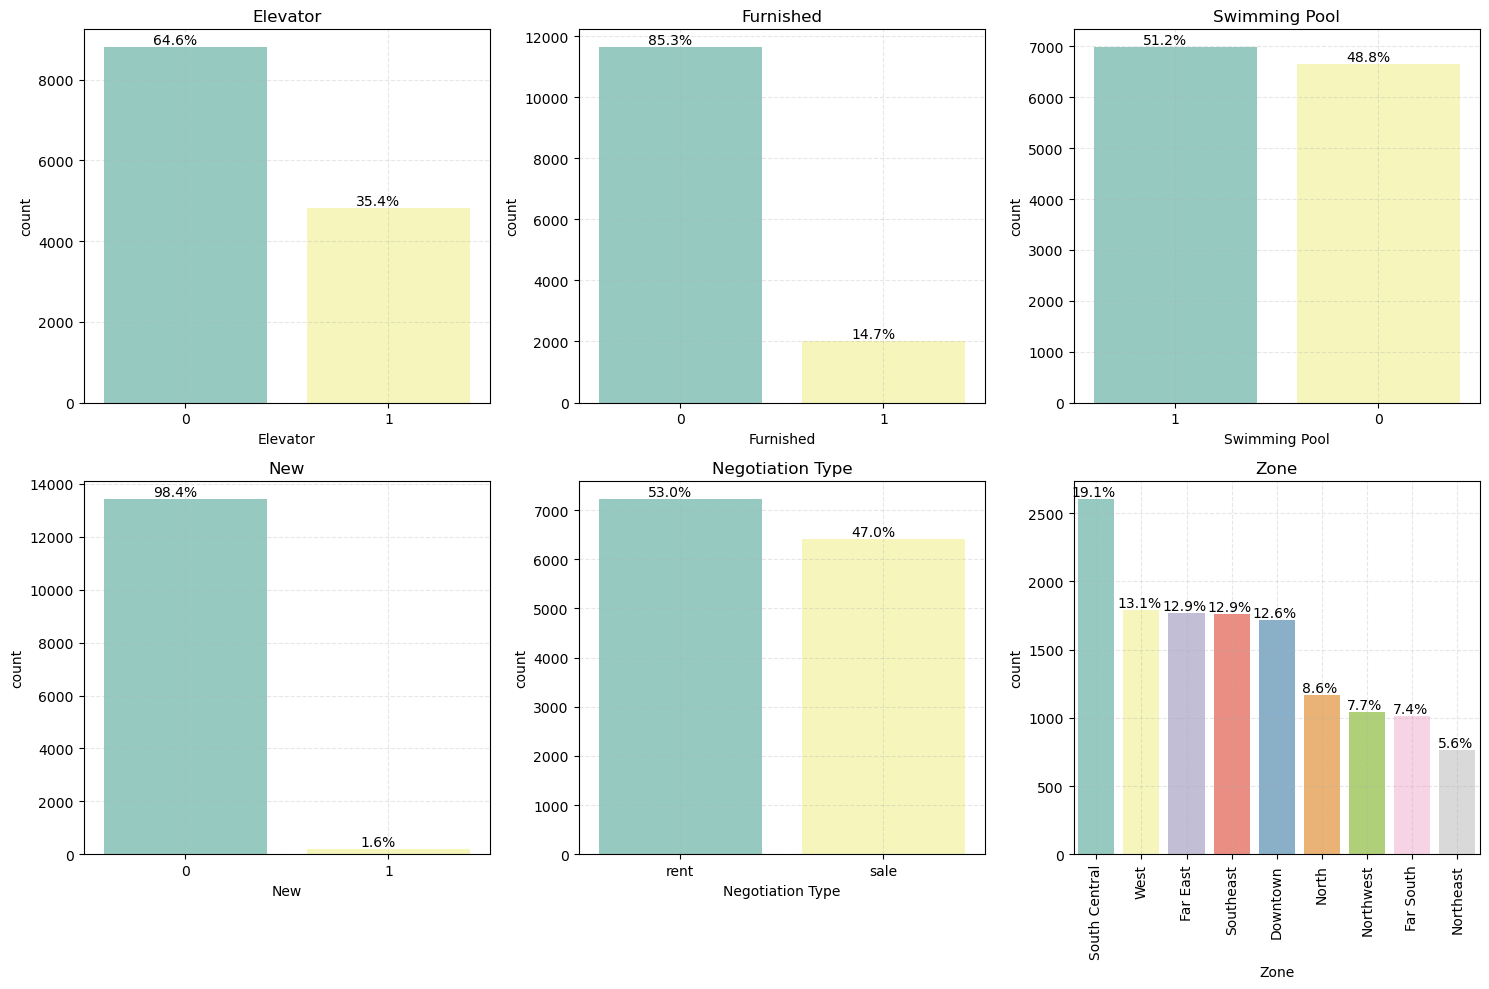

In [22]:
# define kolom yang tidak akan di plot
skipped = ['Longitude', 'Latitude', 'District']

# remove skipped column from list
for i in skipped:
    # remove list
    cat.remove(i)

# set figure
plt.figure(figsize=(15,10))

# countplot
plot_countplot(df,cat,2,3)

# add skipped column to list
for i in skipped:
    # add to list
    cat.append(i)

**Elevator**:<br> 
Sebagian besar (64.6%) apartment memiliki elevator. Hal in mengindikasikan bahwa sebagian besar apartment tidak berada di lantai dasar atau memiliki lebih dari 1 lantai, sehingga membutuhkan elevator untuk menuju ke apartment tersebut.

**Furnished**:<br> 
Sekitar 85% apartment yang dijual telah memiliki furnitur di dalamnya.

**Swimming Pool**:<br> 
Distribusi antara property yang memiliki kolam renang dan yang tidak relatif setara dengan property dengan kolam renang sedikit lebih banyak. Hal ini menandakan bahwa kepemilikian kolam renang tidak menjadi faktor yang memiliki pengaruh besar pada keputusan orang-orang dalam memilih property.

**New**:<br> 
Hampir seluruh property (98.4%) berada dalam kondisi baru. Hal ini dapat mengindikasikan tingginya minat orang-orang dalam bisnis property di kota metropolitan seperti Sao Paulo ini.

**Negotiation Type**: <br>
Distribusi yang hampir setara antara apartment dijual dan disewa menandakan adanya pasar yang kompetitif antar keduanya. Namun, jumlah apartment disewakan yang sedikit lebih banyak dapat mengindikasikan demand yang tinggi atau ketersediaan yang lebih banyak.

**Zone**:<br>
South Central São Paulo memiliki banyak unit apartemen yang dijual atau disewa karena berdasarkan [Wikitravel](https://wikitravel.org/en/S%C3%A3o_Paulo) daerah ini adalah pusat perusahaan dan memiliki banyak fasilitas yang menarik, seperti pusat perbelanjaan, restoran, dan transportasi yang mudah dijangkau. Selain itu, Daerah ini lebih strategis karena berdekatan dengan West Area yang merupakan pusat pemerintahan dan Downtown yang merupakan pusat pendidikan dan perkantoran.
Sementara itu, daerah Northeast São Paulo memiliki jumlah unit apartemen yang paling sedikit untuk dijual atau disewa karena daerah ini lebih terfokus pada komunitas lokal dan memiliki lebih sedikit fasilitas komersial dan infrastruktur yang menarik bagi pendatang atau penghuni baru.

## Inferential Statistik

### Korelasi Target Dengan Setiap Fitur

H0: Fitur-fitur tidak berkorelasi dengan Target.<br>
H1: Fitur-fitur berkorelasi dengan Target.

In [23]:
# loop uji korelasi
for i in df:
    # exclude Price
    if i != 'Price':
        # kondisi jika price vs numerik
        if num:
            # nama kolom yang diuji
            print(i)
            # uji spearmann
            uji_spearman(df,'Price',i)
            
        # kondisi jika price vs kategori
        else:
            # jika zone atau district
            if i == 'Zone' or i == 'District' or i == 'Longitude' or i == 'Latitude':
                # nama kolm yang diuji
                print(i)
                # uji anova
                uji_anova(df,i,'Price')

            # jika selain district dan zone
            else:
                # nama kolomyang diuji
                print(i)
                # uji kendall
                uji_kendall(df,'Price',i)

Condo
koefisien corr = 0.09330723058646771
pvalue = 9.22716622825206e-28

H0 berhasil ditolak: Price berkorelasi dengan Condo

Size
koefisien corr = 0.2760697474248376
pvalue = 4.1951447344383953e-237

H0 berhasil ditolak: Price berkorelasi dengan Size

Rooms
koefisien corr = 0.24045590277458787
pvalue = 1.1883730736643707e-178

H0 berhasil ditolak: Price berkorelasi dengan Rooms

Toilets
koefisien corr = 0.23894695595559376
pvalue = 2.2416642506076667e-176

H0 berhasil ditolak: Price berkorelasi dengan Toilets

Suites
koefisien corr = 0.20577239814496284
pvalue = 2.4750512835619694e-130

H0 berhasil ditolak: Price berkorelasi dengan Suites

Parking
koefisien corr = 0.25354009448846593
pvalue = 4.632963952959235e-199

H0 berhasil ditolak: Price berkorelasi dengan Parking

Elevator
koefisien corr = 0.1501629624756076
pvalue = 1.3021285083615465e-69

H0 berhasil ditolak: Price berkorelasi dengan Elevator

Furnished
koefisien corr = 0.03762791789126768
pvalue = 1.1039915193568172e-05

H0 

Hasil uji korelasi menunjukkan bahwa seluruh fitur memiliki korelasi dengan target. Fitur-fitur selain 'Zone', 'District', 'Longitude' dan 'Latitude' memiliki korelasi positif terhadap target. Ini menunjukkan bahwa tidak ada fitur yang benar-benar "noise" atau tidak penting.

## Distribusi Harga Apartment

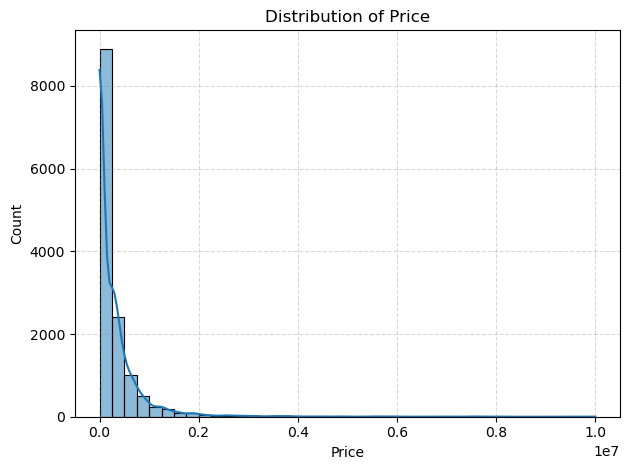

In [24]:
# histogram
plot_histogram(df,['Price'],40)

Berdasarkan distribusi harga, tampak bahwa distribusi data highly positive skew, menunjukkan mayoritas properti berada dalam rentang harga yang lebih rendah/terjangkau, sementara beberapa properti dengan harga sangat tinggi.

Terdapat 2 tipe penjualan properti dalam data, yaitu jual dan sewa dimana biasanya harga sewa lebih rendah daripada harga jual. Mayoritas properti bedara dalam rentang harga yang lebih rendah dapat disebabkan oleh hal tersebut.

### Distribusi Harga Berdasarkan Negotiation Type

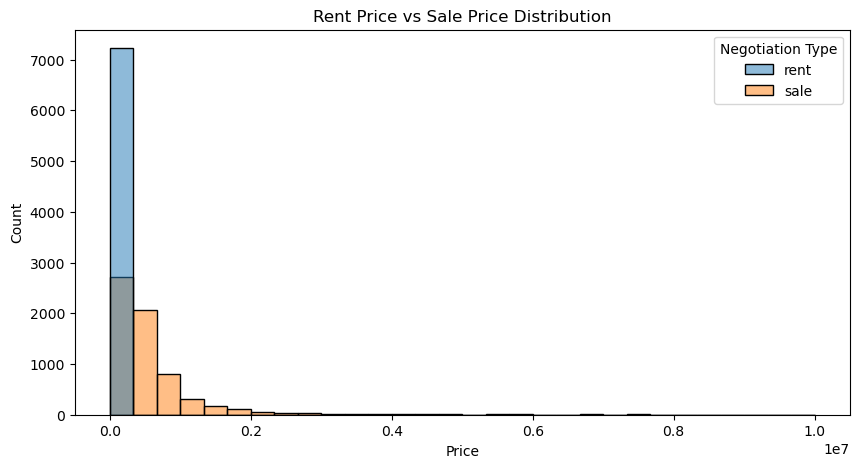

In [25]:
# seg figure
plt.figure(figsize=(10,5))

# histogram rent price vs sale price
sns.histplot(x=df['Price'],
             hue=df['Negotiation Type'],
             bins=30)

# add title
plt.title('Rent Price vs Sale Price Distribution')

# show plot
plt.show()

Berdasarkan grafik, diketahui bahwa harga sewa kebanyakan berkumpul pada harga-harga rendah. Hal ini menunjukkan bahwa sebagian besar properti sewaan cenderung memiliki harga yang lebih terjangkau. Menyewa apartemen dapat menjadi alternatif bagi orang-orang yang ingin tinggal di sao paulo dengan biaya yang lebih terjangkau.

Sebagian besar harga jual juga terkonsentrasi di kisaran harga rendah, tetapi distribusi harga jual lebih meluas dibandingkan harga sewa. Properti jual memiliki variasi harga yang jauh lebih besar, termasuk sejumlah kecil properti yang dijual dengan harga tinggi (hingga mendekati 10 juta).

In [26]:
# filter Negotiation Type = sell
sale = df[df['Negotiation Type']=='sale']

# filter Negotiation Type = rent
rent = df[df['Negotiation Type']=='rent']

In [27]:
# deskriptive apartment for sale
check_deskriptif(sale,['Price'])

,count,mean,std,min,25%,50%,75%,max,skewness,jenis_skewness
Price,6412.0,608624.14005,740451.549192,42000.0,250000.0,380000.0,679000.0,10000000.0,5.09828,skewed


In [28]:
# deskriptice apartment for rent
check_deskriptif(rent,['Price'])

,count,mean,std,min,25%,50%,75%,max,skewness,jenis_skewness
Price,7228.0,3077.669065,3522.830284,480.0,1350.0,2000.0,3300.0,50000.0,4.874126,skewed


Rata-rata harga properti yang dijual jauh lebih tinggi dari properti yang disewakan. Hal ini memperkuat bahwa market properti di Sao Paulo memiliki karakteristik yang sangat berbeda antara penjualan dan penyewaan apartemen.

Rata-rata harga jual yang jauh lebih tinggi dibanding harga sewa menunjukkan bahwa kepemilikan apartemen mungkin hanya dapat diakses oleh segmen masyarakat dengan daya beli tinggi, sementara segmen lainnya lebih mengandalkan pasar sewa untuk memenuhi kebutuhan hunian mereka.

## Map

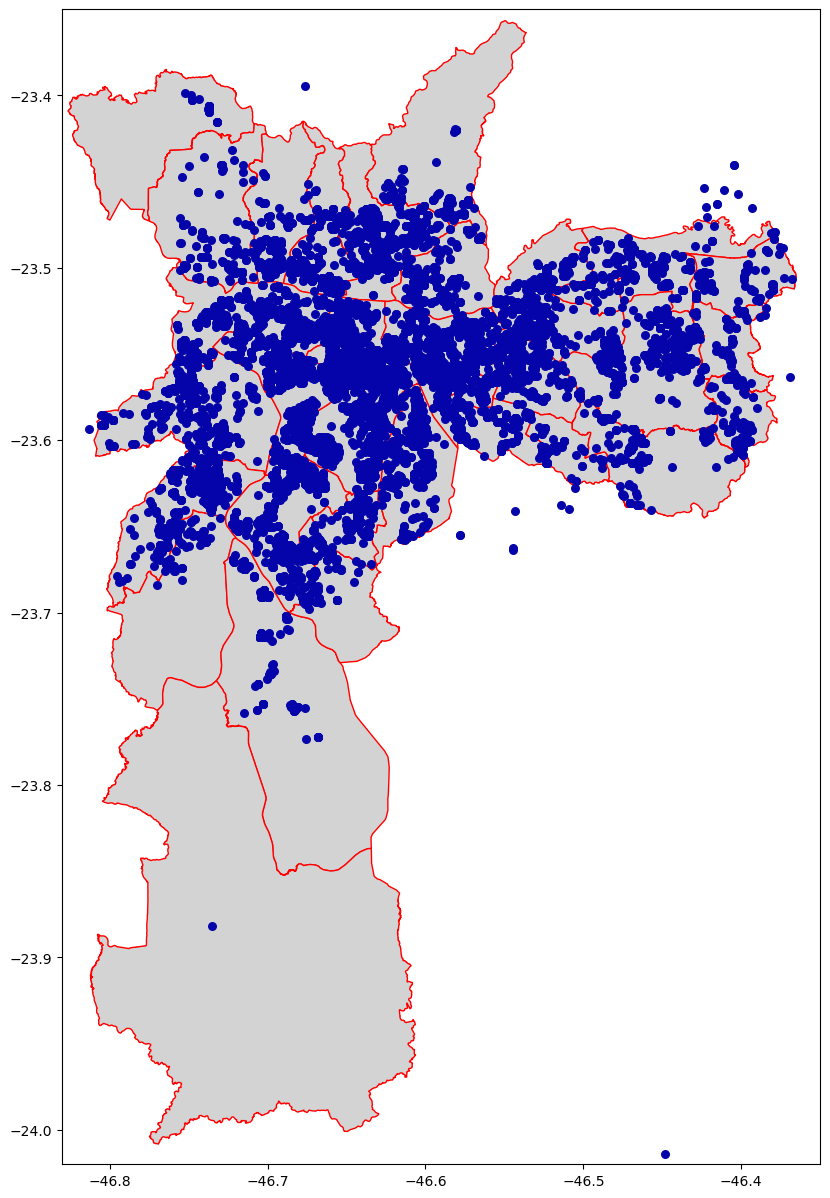

In [29]:
# Load the GeoJSON file
saopaulo_boundary = gpd.read_file('subprefeituras-sp-master/data/subprefeituras-sp.geojson')

# Create the map plot
fig, ax = plt.subplots(figsize=(20, 15))
saopaulo_boundary.plot(ax=ax, color='lightgrey', edgecolor='red')

# Scatter plot with limits set for the entire São Paulo area
ax.scatter(df['Longitude'], df['Latitude'], c='#0504aa', s=30)

# Set limits to focus on São Paulo
ax.set_xlim([-46.83, -46.35])
ax.set_ylim([-24.02, -23.35])

# Show the map
plt.show()


Titik biru menunjukkan bahwa sebagian besar apartemen yang dijual terkonsentrasi di bagian tengah dan utara São Paulo. Ini sesuai dengan ekspektasi bahwa pusat kota dan area bisnis biasanya memiliki aktivitas real estat yang tinggi.

Wilayah pusat São Paulo dikenal sebagai pusat ekonomi dengan permintaan tinggi untuk apartemen, baik untuk pembelian maupun penyewaan, sehingga fasilitas publik, akses transportasi, dan peluang kerja lebih banyak tersedia di pusat kota dibandingkan dengan wilayah pinggiran.

## Top 5 Area Dengan Median Harga Tertinggi

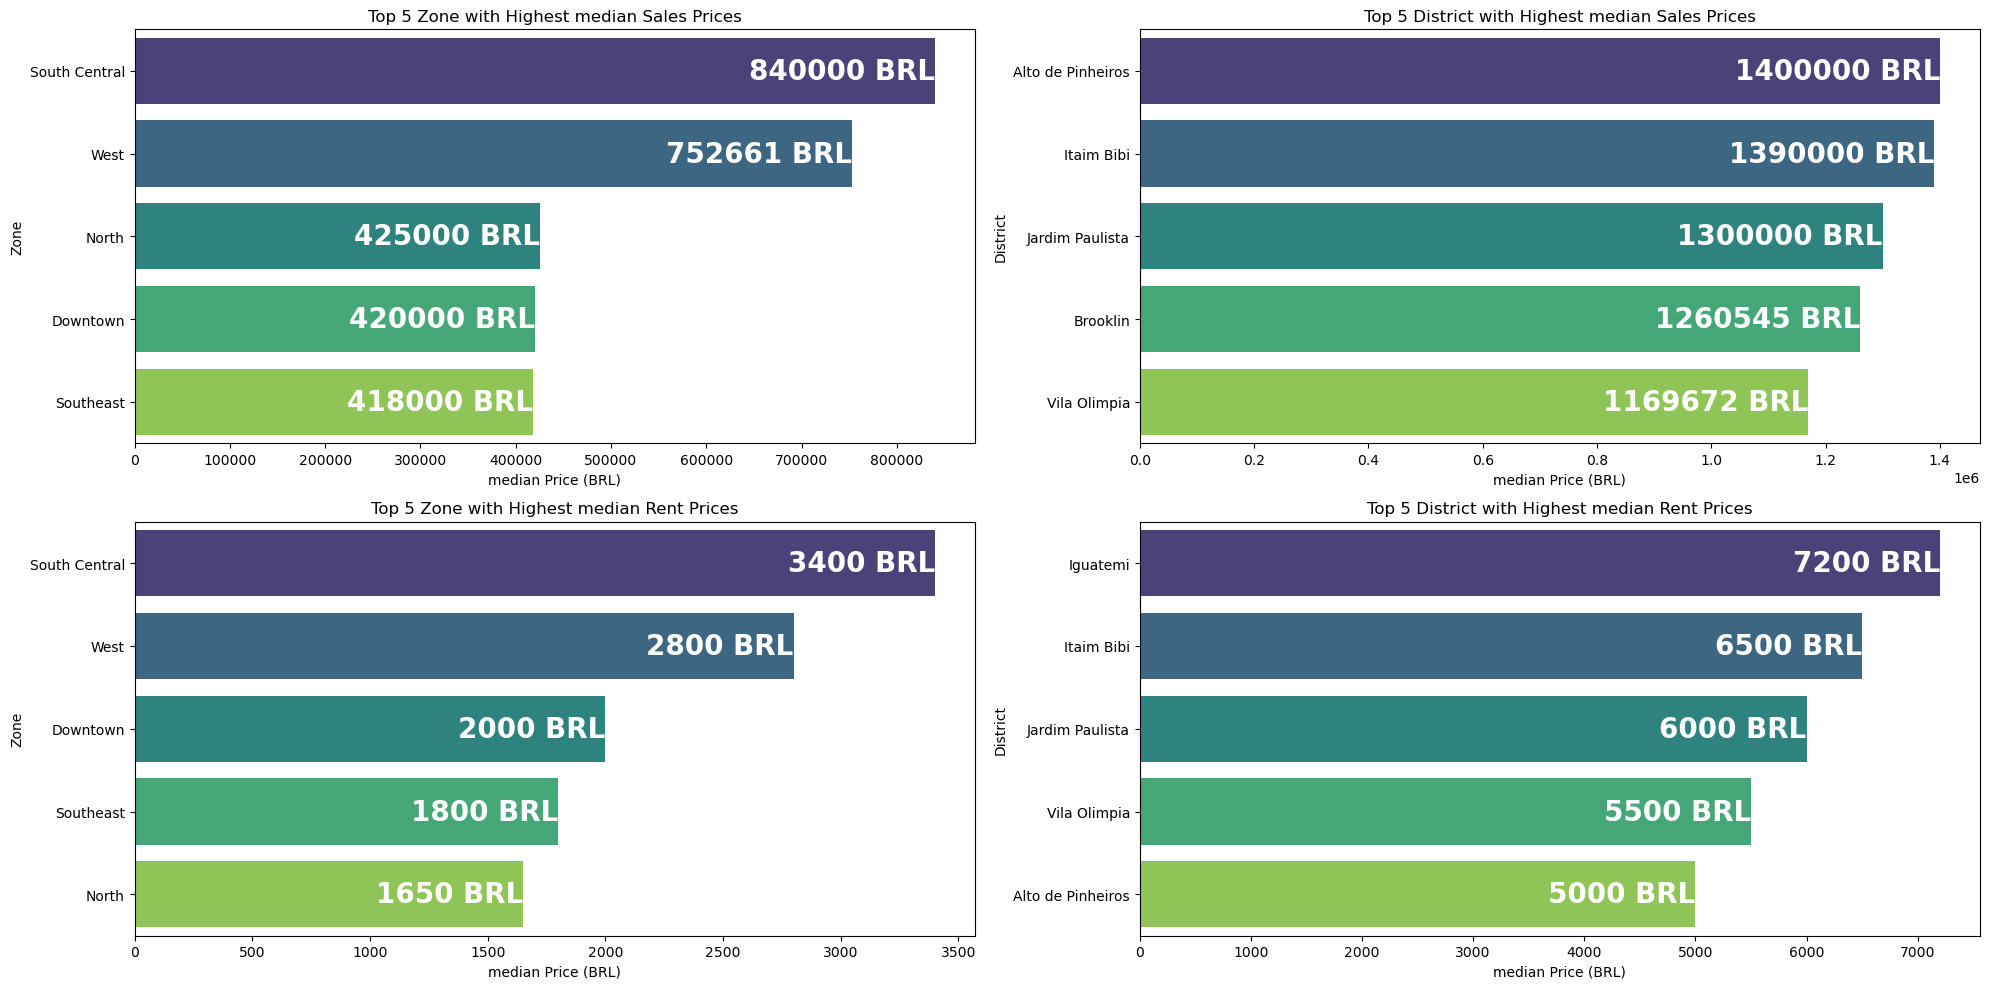

In [30]:
# define top 5 columns
top_5_col = ['Zone', 'District']

# set figure
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# loop barplot
for idx, i in enumerate(top_5_col):
    # Sales Data
    # group by col & calculate median
    median_prices_sale = sale.groupby(i).agg({'Price': 'median'}).reset_index()
    # top 5 apart for sale
    top_5_sale = median_prices_sale.sort_values(by='Price', ascending=False).head(5)

    # axes Sale plot
    ax_sale = axes[0, idx]
    # bar plot
    sns.barplot(x='Price', y=i, data=top_5_sale, palette='viridis', ax=ax_sale)

    # add title
    ax_sale.set_title(f'Top 5 {i} with Highest median Sales Prices')
    # set x label
    ax_sale.set_xlabel('median Price (BRL)')
    # set y label
    ax_sale.set_ylabel(i)

    # loop Add annotations
    for p in ax_sale.patches:
        # get width
        width = p.get_width()
        # get height
        height = p.get_height()
        # add annotation
        ax_sale.text(width, p.get_y() + height / 2, f'{int(width)} BRL',
                     ha='right', va='center', color='white', weight='bold', fontsize=20)

    # Rent Data
    # group by col & calculate median
    median_prices_rent = rent.groupby(i).agg({'Price': 'median'}).reset_index()
    # top 5 apart for sale
    top_5_rent = median_prices_rent.sort_values(by='Price', ascending=False).head(5)

    # axes Sale plot
    ax_rent = axes[1, idx]
    # bar plot
    sns.barplot(x='Price', y=i, data=top_5_rent, palette='viridis', ax=ax_rent)

    # add title
    ax_rent.set_title(f'Top 5 {i} with Highest median Rent Prices')
    # set x label
    ax_rent.set_xlabel('median Price (BRL)')
    # set y label
    ax_rent.set_ylabel(i)

    # loop Add annotations
    for p in ax_rent.patches:
        # get width
        width = p.get_width()
        # get height
        height = p.get_height()
        # add annotation
        ax_rent.text(width, p.get_y() + height / 2, f'{int(width)} BRL',
                     ha='right', va='center', color='white', weight='bold', fontsize=20)

# show plot
plt.tight_layout()
plt.show()

- Zona Pusat Selatan dan Distrik Itaim Bibi serta Jardim Paulista menunjukkan potensi investasi yang kuat dengan harga yang konsisten tinggi.

- Pengembangan Infrastruktur: Perkembangan infrastruktur dan fasilitas yang baik di area ini mungkin terus mendorong harga ke atas, menjadikannya pilihan utama untuk investasi jangka panjang.

Bagaimana dengan biaya service-nya?

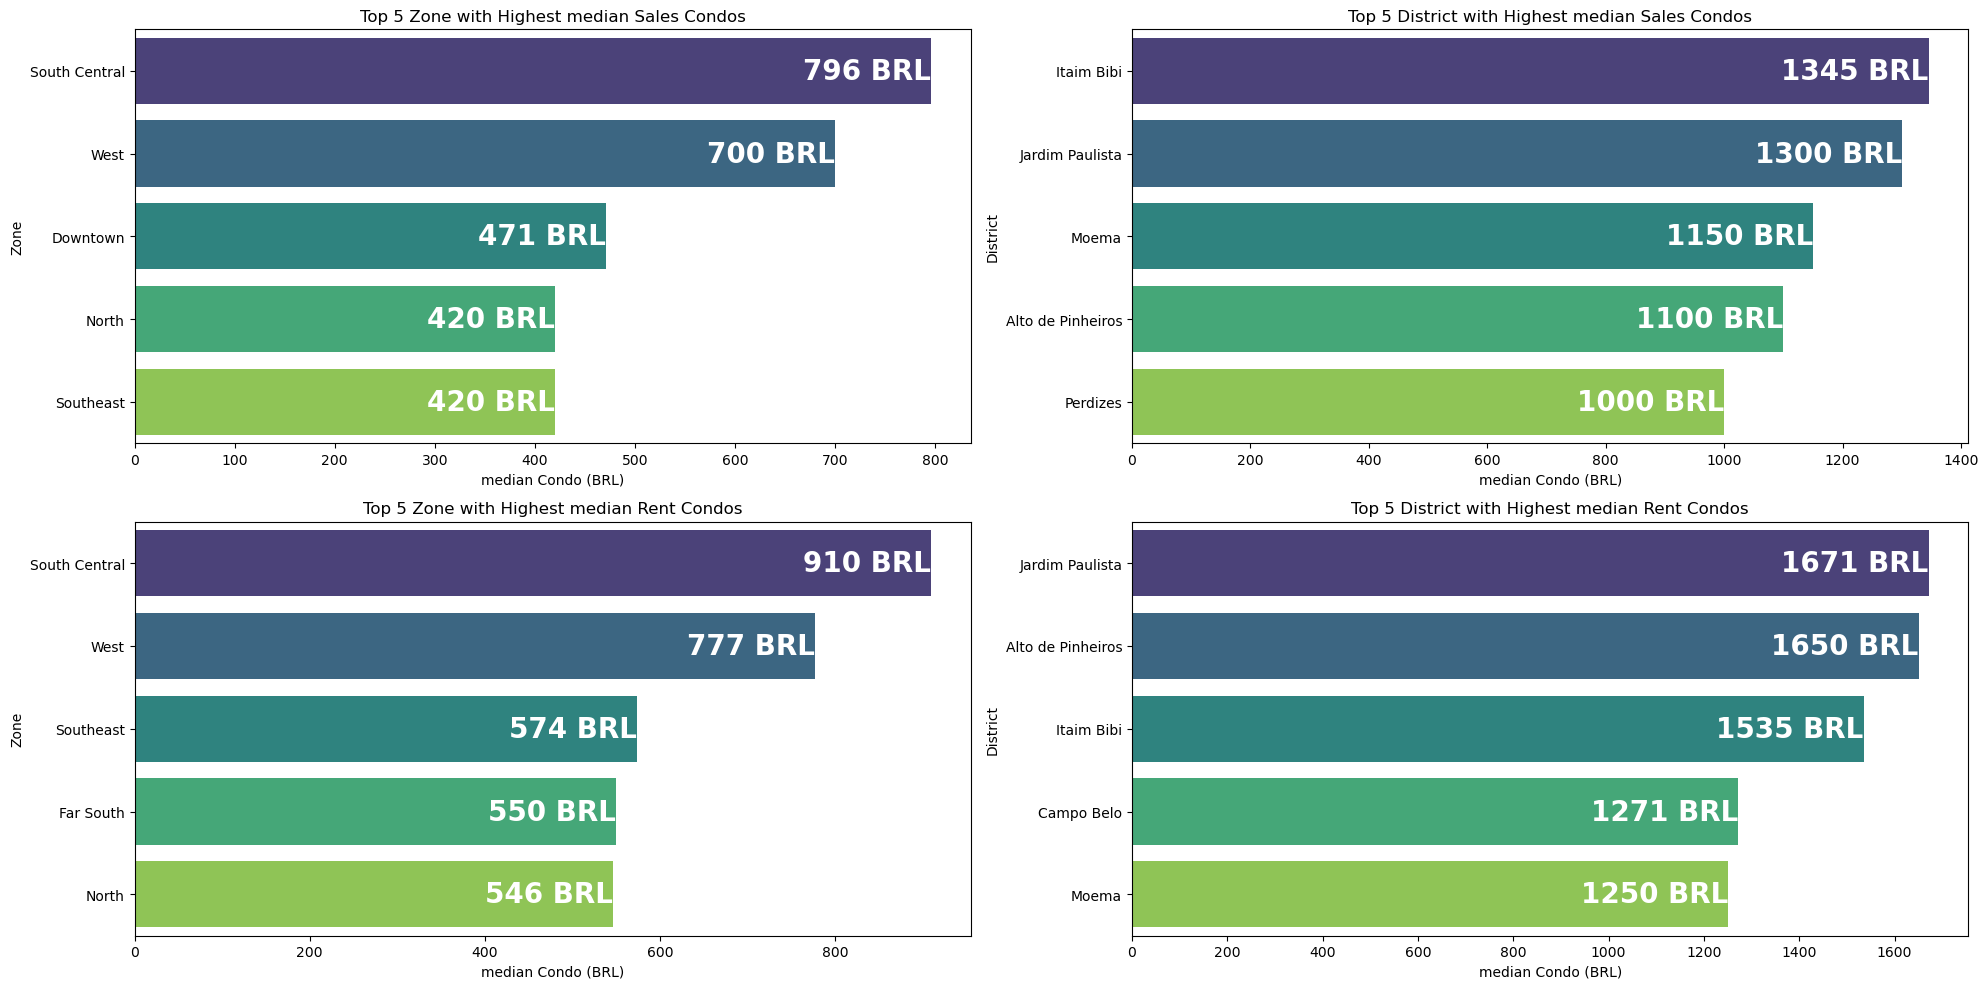

In [31]:
# define top 5 columns
top_5_col = ['Zone', 'District']

# set figure
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# loop barplot
for idx, i in enumerate(top_5_col):
    # Sales Data
    # group by col & calculate median
    median_Condos_sale = sale.groupby(i).agg({'Condo': 'median'}).reset_index()
    # top 5 apart for sale
    top_5_sale = median_Condos_sale.sort_values(by='Condo', ascending=False).head(5)

    # axes Sale plot
    ax_sale = axes[0, idx]
    # bar plot
    sns.barplot(x='Condo', y=i, data=top_5_sale, palette='viridis', ax=ax_sale)

    # add title
    ax_sale.set_title(f'Top 5 {i} with Highest median Sales Condos')
    # set x label
    ax_sale.set_xlabel('median Condo (BRL)')
    # set y label
    ax_sale.set_ylabel(i)

    # loop Add annotations
    for p in ax_sale.patches:
        # get width
        width = p.get_width()
        # get height
        height = p.get_height()
        # add annotation
        ax_sale.text(width, p.get_y() + height / 2, f'{int(width)} BRL',
                     ha='right', va='center', color='white', weight='bold', fontsize=20)

    # Rent Data
    # group by col & calculate median
    median_Condos_rent = rent.groupby(i).agg({'Condo': 'median'}).reset_index()
    # top 5 apart for sale
    top_5_rent = median_Condos_rent.sort_values(by='Condo', ascending=False).head(5)

    # axes Sale plot
    ax_rent = axes[1, idx]
    # bar plot
    sns.barplot(x='Condo', y=i, data=top_5_rent, palette='viridis', ax=ax_rent)

    # add title
    ax_rent.set_title(f'Top 5 {i} with Highest median Rent Condos')
    # set x label
    ax_rent.set_xlabel('median Condo (BRL)')
    # set y label
    ax_rent.set_ylabel(i)

    # loop Add annotations
    for p in ax_rent.patches:
        # get width
        width = p.get_width()
        # get height
        height = p.get_height()
        # add annotation
        ax_rent.text(width, p.get_y() + height / 2, f'{int(width)} BRL',
                     ha='right', va='center', color='white', weight='bold', fontsize=20)

# show plot
plt.tight_layout()
plt.show()

- Konsistensi Zona: Zona Selatan Tengah menunjukkan biaya service yang tinggi baik untuk jual maupun sewa, menunjukkan bahwa ini adalah area yang mungkin sangat ekslusif.
- Ketertinggalan Distrik: Distrik Itaim Bibi dan Jardim Paulista menunjukkan biaya service yang sangat tinggi, menunjukkan bahwa ini adalah area yang sangat eksklusif dan mungkin memiliki banyak fasilitas yang menarik.

## Perbandingan Harga Apartment dengan Furnished dan Tidak

H0: Tidak terdapat perbedaan yang signifikan pada Furnished dan Price.<br>
H1: Terdapat perbedaan yang signifikan pada Furnished dan Price.

In [32]:
# uji signifikansi
uji_mannwhitney(df,'Furnished','Price')

U-Statistic: 10934516.0, P-Value: 1.1107103686550748e-05
tstat = 10934516.0
pvalue = 1.1107103686550748e-05

H0 berhasil ditolak: terdapat perbedaan yang signifikan pada Furnished dan Price



(10934516.0, 1.1107103686550748e-05)

Hasil uji mannwhitney menunjukkan bahwa rata-rata apparttemen yang sudah terisi furnitur dan yang belum signifikan berbeda. Untuk lebih jelasny, perhatikan grafik dibawah:

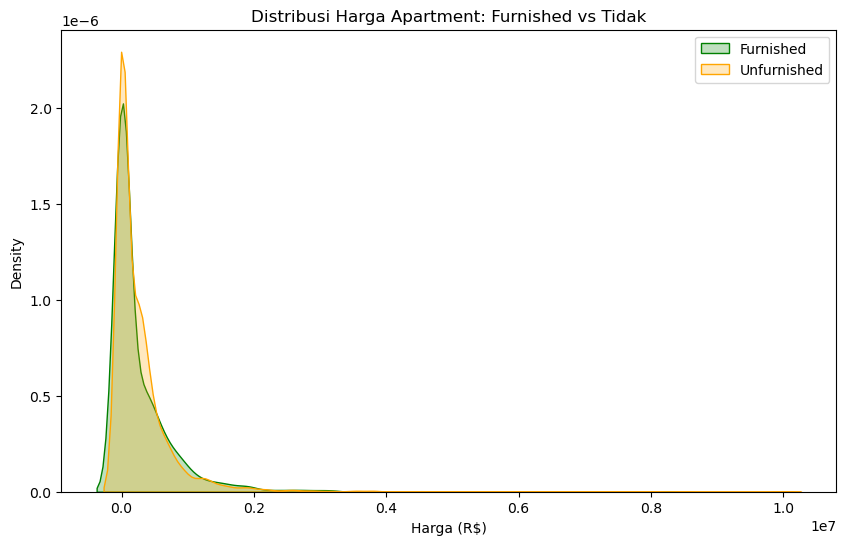

In [33]:
# set figure
plt.figure(figsize=(10, 6))

# histogram  Furnished
sns.kdeplot(df.loc[df['Furnished'] == 1, 'Price'], shade=True, label='Furnished', color='green')
# histogram unfurnished
sns.kdeplot(df.loc[df['Furnished'] == 0, 'Price'], shade=True, label='Unfurnished', color='orange')

# set title
plt.title('Distribusi Harga Apartment: Furnished vs Tidak')
# set x label
plt.xlabel('Harga (R$)')
# add legend
plt.legend()

# show plot
plt.show()

In [34]:
# Statistik deskriptif berdasarkan Furnished
df.groupby('Furnished')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Furnished,,,,,,,,
0,11638.0,289302.363207,593054.519671,480.0,1800.0,11000.0,360000.0,10000000.0
1,2002.0,278642.594905,577730.573623,720.0,2500.0,5800.0,383750.0,8039200.0


Dapat dilihat bahwa Kedua kurva menunjukkan bahwa mayoritas apartemen berada di kisaran harga rendah. Puncak distribusi untuk apartemen unfurnished (oranye) lebih tinggi dibandingkan apartemen furnished (hijau), menunjukkan lebih banyak apartemen unfurnished yang tersedia di harga rendah.

banyaknya apartemen yang dijual/disewa mungkin dapat mencerminkan Pembeli atau penyewa yang cenderung memilih apartemen unfurnished di kisaran harga yang lebih rendah, mungkin karena biaya awal yang lebih terjangkau atau preferensi untuk menata ruang mereka sendiri.

## Perbandingan Harga Apartment Baru dan Bekas

H0: Tidak terdapat perbedaan yang signifikan pada harga apartemen baru dan tidak baru.<br>
H1: Terdapat perbedaan yang signifikan pada  baru dan tidak baru.

In [35]:
# uji signifikansi
uji_mannwhitney(df,'New','Price')

U-Statistic: 844147.0, P-Value: 9.131026585895732e-25
tstat = 844147.0
pvalue = 9.131026585895732e-25

H0 berhasil ditolak: terdapat perbedaan yang signifikan pada New dan Price



(844147.0, 9.131026585895732e-25)

Hasil uji mannwhitney menunjukkan bahwa rata-rata harga apparttemen dengan kondisi baru dan tidak signifikan berbeda. Untuk lebih jelasnya, perhatikan grafik dibawah:

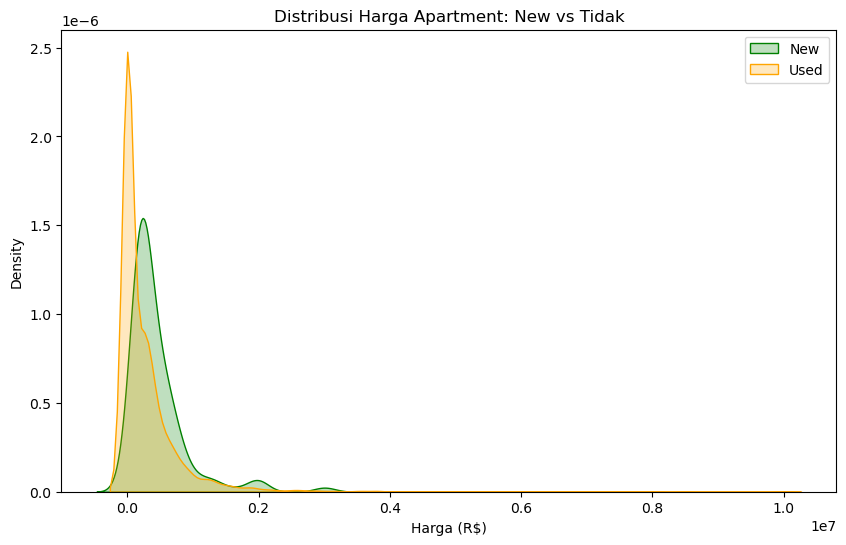

In [36]:
# set figure
plt.figure(figsize=(10, 6))

# histogram  New
sns.kdeplot(df.loc[df['New'] == 1, 'Price'], shade=True, label='New', color='green')
# histogram Used
sns.kdeplot(df.loc[df['New'] == 0, 'Price'], shade=True, label='Used', color='orange')

# set title
plt.title('Distribusi Harga Apartment: New vs Tidak')
# set x label
plt.xlabel('Harga (R$)')
# add legend
plt.legend()

# show plot
plt.show()

In [37]:
# Statistik deskriptif berdasarkan Furnished
df.groupby('New')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
New,,,,,,,,
0,13427.0,285221.807477,592385.189447,480.0,1800.0,7500.0,358950.0,10000000.0
1,213.0,446338.821596,455922.086859,1250.0,184900.0,265999.0,531000.0,3050003.0


- Puncak distribusi untuk apartemen bekas (oranye) lebih tajam di harga yang lebih rendah dibandingkan apartemen baru (hijau), menunjukkan bahwa lebih banyak apartemen bekas yang tersedia di harga rendah.
- meskipun puncaknya lebih rendah, kurva apartemen baru menunjukkan distribusi harga yang lebih lebar, menunjukkan adanya variasi harga yang lebih besar.

# Feature Engineering

## Handling Duplicate

In [38]:
# cek duplicated value
print(f"\nduplicated values: {round(((df.duplicated().sum())/len(df))*100,2)}% \n{df.duplicated().sum()}\n")


duplicated values: 2.34% 
319



Terdapat 319 atau 2.34% duplicate dalam dataset. Untuk langkah selanjutnya, nilai duplicate harus dilihat terlebih dahulu.

In [39]:
df[df.duplicated()]

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Latitude,Longitude,Zone
165,1300.0,387.0,50.0,2,2,1,1,0,0,0,0,Cidade Tiradentes,rent,-23.582576,-46.417478,Far East
203,999.0,0.0,70.0,2,2,1,1,0,0,0,0,Ermelino Matarazzo,rent,-23.494694,-46.478125,Far East
204,888.0,0.0,70.0,2,2,1,1,0,0,0,0,Ermelino Matarazzo,rent,-23.494694,-46.478125,Far East
207,8000.0,1400.0,132.0,3,2,1,1,0,0,0,0,Iguatemi,rent,-23.585672,-46.681216,Far East
208,8000.0,1400.0,132.0,3,2,1,1,0,0,0,0,Iguatemi,rent,-23.585672,-46.681216,Far East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13105,189000.0,0.0,40.0,2,1,0,1,0,0,1,0,Sao Mateus,sale,-23.611443,-46.459974,Far East
13115,189000.0,0.0,40.0,2,1,0,1,0,0,1,0,Sao Mateus,sale,-23.611443,-46.459974,Far East
13272,233750.0,100.0,47.0,2,2,1,1,1,0,0,0,Vila Jacui,sale,-23.501856,-46.456386,Far East
13496,660000.0,450.0,107.0,3,2,1,2,0,0,0,0,Cidade Ademar,sale,-23.660596,-46.667492,Far South


Terdapat 2.34% atau 319 duplicate values, tetapi karena data tidak memilik primary key dan juga sangat memungkinkan untuk 2 unit berada dalam satu gedung apartment yans sama (latititude dan longitude sama). Sehingga memungkinkan pula unit unit memiliki spesifikasi, harga jual, bahkan agen properti yang sama.

## Handling Cardinality

In [40]:
for col in df:
    print(f'{col}-#nunique: {df[col].nunique()}')

Price-#nunique: 1881
Condo-#nunique: 1415
Size-#nunique: 339
Rooms-#nunique: 8
Toilets-#nunique: 8
Suites-#nunique: 7
Parking-#nunique: 10
Elevator-#nunique: 2
Furnished-#nunique: 2
Swimming Pool-#nunique: 2
New-#nunique: 2
District-#nunique: 96
Negotiation Type-#nunique: 2
Latitude-#nunique: 8405
Longitude-#nunique: 8451
Zone-#nunique: 9


- Kolom-kolom yang numerik terlihat normal.
- Beberapa kolom kategorik memiliki terlalu banyak/sedikit unique value seperti:
    - 'Longitude' (8451 unique value) dan 'Latitude' (8405 unique value): Kedua kolom ini tidak akan dipakai dalam modeling karena memiliki terlalu banyak unique value dan juga isinya sudah diwakilkan oleh 'District' dan 'Zone' yang juga berisi informasi tentang lokasi.
    - 'District' (96 unique value): Telah dikelompokkan ulang sesuai dengan [pembagian wilayahnya](https://wikitravel.org/en/S%C3%A3o_Paulo) (West, Downtown, Norteast, etc.) pada kolom 'Zone'. Maka dari itu, 'District' dapat dihapus dari dataset.

## Split Data

Untuk menghindari data leakage, spliting data perlu dilakukan sebelum melakukan handling outlier, missung value, dll. Data akan di-split dengan perbandingan 80:20.

In [41]:
# fitur & target
X = df.drop(columns='Price')
y = df[['Price']]

#split
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.2,
                                                 random_state=42)

# train-test set
train = pd.concat([X_train,y_train],axis=1)
test = pd.concat([X_test,y_test],axis=1)

In [42]:
# divide numeric & categoric
X_num = num.copy()
X_cat = cat.copy()

# remove target
X_num.remove('Price')

# check numerik-kategorik
print(f'numerik: {X_num}')
print(f'kategorik: {X_cat}')

numerik: ['Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking']
kategorik: ['Elevator', 'Furnished', 'Swimming Pool', 'New', 'Negotiation Type', 'Zone', 'Longitude', 'Latitude', 'District']


Kolom kategorik dan numerik telah dipisahkan untuk membantu pada tahap preprocessing dan modeling nantinya.

In [43]:
# save train & test
X_train_org = X_train.copy()
X_test_org  = X_test.copy()
y_test_org  = y_test.copy()
y_train_org = y_train.copy()

In [44]:
# Load
X_train = X_train_org.copy()
X_test  = X_test_org.copy()
y_test  = y_test_org.copy()
y_train = y_train_org.copy()

## Handling Missing Value

Seperti yang sudah dijelaskan di atas bahwa terdapat non-standard missing value pada kolom 'Condo', yaitu pada value "0" yang menandakan nilai yang tidak diketahui.

In [45]:
# filter missing value pada COndo
mv_condo = X_train[X_train['Condo']==0]

# check shape
print(mv_condo.shape)

# check missing value
mv_condo.sample(5)

(1597, 15)


,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Latitude,Longitude,Zone
1779,0.0,62.0,2,2,1,1,1,1,1,0,Freguesia do O,rent,-23.498810,-46.704657,Northwest
9602,0.0,49.0,2,2,1,1,0,0,0,0,Artur Alvim,rent,-23.543748,-46.481472,Far East
11232,0.0,41.0,1,2,1,1,1,0,1,1,Bela Vista,sale,-23.554708,-46.651518,Downtown
3541,0.0,50.0,1,1,0,1,0,0,0,0,Ipiranga,rent,-23.588898,-46.600504,South Central
1667,0.0,50.0,2,2,1,1,0,0,0,0,Brasilandia,rent,-23.469905,-46.698401,Northwest


Untuk mencari tau jenis missing value, perlu dicari tau mengenai polanya. Selanjutnya, akan dicari tau hubungan kolom yang memiliki missing value dengan fitur-fitur lain dengan uji korelasi.

H0: Condo dan fitur-fitur lain tidak memiliki korelasi.<br>
H1: Condo dan fitur-fitur lain memiliki korelasi.

In [46]:
# loop uji korelasi
for i in df:
    # exclude Condo
    if i != 'Condo':
        # kondisi jika Condo vs numerik
        if num:
            # nama kolom yang diuji
            print(i)
            # uji spearmann
            uji_spearman(df,'Condo',i)
            
        # kondisi jika Condo vs kategori
        else:
            # jika zone atau district
            if i == 'Zone' or i == 'District' or i == 'Longitude' or i == 'Latitude':
                # nama kolm yang diuji
                print(i)
                # uji anova
                uji_anova(df,i,'Condo')

            # jika selain district dan zone
            else:
                # nama kolomyang diuji
                print(i)
                # uji kendall
                uji_kendall(df,'Condo',i)

Price
koefisien corr = 0.09330723058646771
pvalue = 9.22716622825206e-28

H0 berhasil ditolak: Condo berkorelasi dengan Price

Size
koefisien corr = 0.6141540832457482
pvalue = 0.0

H0 berhasil ditolak: Condo berkorelasi dengan Size

Rooms
koefisien corr = 0.4017156309904164
pvalue = 0.0

H0 berhasil ditolak: Condo berkorelasi dengan Rooms

Toilets
koefisien corr = 0.38830725395787175
pvalue = 0.0

H0 berhasil ditolak: Condo berkorelasi dengan Toilets

Suites
koefisien corr = 0.3468607205410537
pvalue = 0.0

H0 berhasil ditolak: Condo berkorelasi dengan Suites

Parking
koefisien corr = 0.5071860447029314
pvalue = 0.0

H0 berhasil ditolak: Condo berkorelasi dengan Parking

Elevator
koefisien corr = 0.02218206651241949
pvalue = 0.009577149503176044

H0 berhasil ditolak: Condo berkorelasi dengan Elevator

Furnished
koefisien corr = 0.14781389296091185
pvalue = 1.7435825417223317e-67

H0 berhasil ditolak: Condo berkorelasi dengan Furnished

Swimming Pool
koefisien corr = 0.2130013505771010

'Condo' memiliki korelasi dengan seluruh kolom. Jadi, kemungkinan jenis missing valuenya adalah MAR atau MNAR. untuk memastikannya, akan dicari pola dengan group by.

In [47]:
mv_condo.groupby('Negotiation Type').size().sort_values(ascending=False)

Negotiation Type
sale    1085
rent     512
dtype: int64

In [48]:
mv_condo.groupby('Zone').size().sort_values(ascending=False)

Zone
Far East         418
Southeast        208
South Central    191
North            177
West             137
Northwest        134
Downtown         120
Northeast        110
Far South        102
dtype: int64

In [49]:
mv_condo[mv_condo['Zone']=='Far East'].groupby('District').size().sort_values(ascending=False)

District
Ermelino Matarazzo    47
Itaquera              34
Sao Mateus            32
Artur Alvim           31
Sao Miguel            27
Cidade Tiradentes     27
Jardim Helena         25
Vila Jacui            23
Cangaiba              22
Cidade Lider          19
Parque do Carmo       18
Iguatemi              17
Jose Bonifacio        17
Guaianazes            16
Ponte Rasa            15
Vila Curuca           15
Itaim Paulista        14
Lajeado               12
Sao Rafael             7
dtype: int64

Dari beberapa percobaan group by, tidak ditemukan adanya pola terjadinya missing value.

MNAR: Missing value terjadi karena terjadi karena ada penyebab lain yang tidak diketahui. beberapa kemungkinannya:
1. Data Entry Errors: Human error atau system error ketika memasukkan data.
2. Variability Data Sources: berdasarkan deskripsi data di atas, dataset ini merupakan kumpulan harga apartment dari berbagai sumber yang bisa jadi beberapa sumber tidak memiliki informasi lengkap mengenai biaya kondomium.
3. dll.

Untuk itu, penanganan missing value akan dilakukan dengan imputasi median dari biaya service per distriknya.

In [50]:
# replace 0 with nan
X_train['Condo'] = X_train['Condo'].replace(0, np.nan)

# median per district
median_district = X_train.groupby('District')[['Condo']].median()

# fill missing value dengan median per district
X_train['Condo'] = X_train['Condo'].fillna(X_train.groupby('District')['Condo'].transform('median'))

# fill missing value dengan median per district (test)
X_test['Condo'] = X_test['Condo'].fillna(X_train.groupby('District')['Condo'].transform('median'))

# check
print('train', X_train.isna().sum().sum())
print('test', X_test.isna().sum().sum())

train 0
test 0


Missing value telah ditangani dan tersisa 0 missing value.

In [51]:
# save train & test
X_train_nomv = X_train.copy()
X_test_nomv  = X_test.copy()
y_test_nomv  = y_test.copy()
y_train_nomv = y_train.copy()

In [52]:
# Load
X_train = X_train_nomv.copy()
X_test  = X_test_nomv.copy()
y_test  = y_test_nomv.copy()
y_train = y_train_nomv.copy()

## Handling Outlier

In [53]:
# check outlier
check_outlier(X_train,X_num)

,batas_atas,batas_bawah,persentase
Condo,2421.000000,-1142.000000,3.72
Size,226.000000,-82.000000,3.70
Rooms,4.654333,-0.019803,0.20
Toilets,2.000000,2.000000,39.73
Suites,1.000000,1.000000,36.22
Parking,5.000000,-2.000000,0.16


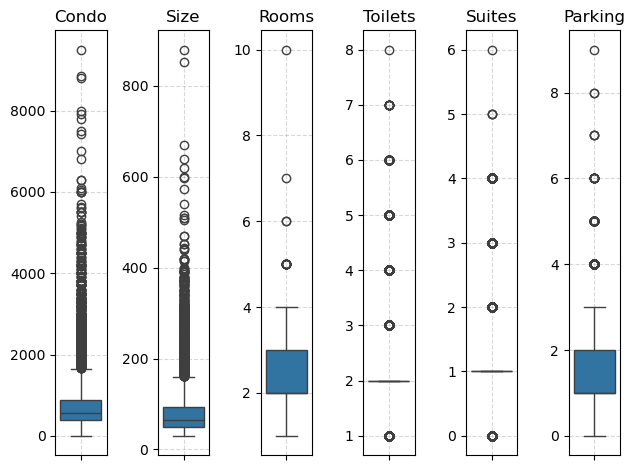

In [54]:
# box plot
plot_boxplot(X_train,X_num)

- Condo dan Size memiliki outlier yang banyak yaitu sekitar 3.7%. Size akan dilakukan handling outlier, sedangkan untuk Condo, tidak akan dilakukan handling outlier dikarenakan outlier pada harga service dapat mencerminkan variasi yang sebenarnya ada di pasar. Biaya service yang sangat tinggi atau rendah mungkin mencerminkan layanan premium atau ekonomi yang memang ada di berbagai apartemen.
- Toilets dan Suites memilki persentase outlier yang sangat tinggi mencapai hampir 40%, tetapi dikarenakan variasinya yang sangat sedikit, tidak dilakukan capping.

In [55]:
# cek deskriptif
num_desc = check_deskriptif(X_train,X_num)

# cek skewness
num_desc[['skewness','jenis_skewness']]

,skewness,jenis_skewness
Condo,3.505451,skewed
Size,3.110908,skewed
Rooms,0.367058,normal
Toilets,1.594305,skewed
Suites,1.469252,skewed
Parking,1.864687,skewed


Penentuan metode capping adalah dengan melihat distribusi datanya.
- iqr fold 3: ['Size', 'Parking']
- gaussian fold 3: ['Rooms']

In [56]:
# set column sesuai metode caping
## outlier extreeme
iqr_fold_3 = X_num.copy()

# define collumn that will not handle outlier with iqr
dropped = ['Rooms','Toilets', 'Suites', 'Condo']
# drop distribusi normal
for i in dropped:
    # drop
    iqr_fold_3.remove(i)

# distribusi normal
normal = ['Rooms']

# skew dist capping
winsoriser_cap = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=3,
                             variables=iqr_fold_3)
# fit transform ke train
X_train[iqr_fold_3] = winsoriser_cap.fit_transform(X_train[iqr_fold_3])
# transform ke test
X_test[iqr_fold_3] = winsoriser_cap.transform(X_test[iqr_fold_3])

# normal dist capping outlier
winsoriser_cap = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=1.5,
                             variables=normal)
# fit transform ke train
X_train[normal] = winsoriser_cap.fit_transform(X_train[normal])
# transform ke test
X_test[normal] = winsoriser_cap.transform(X_test[normal])

# re-add dropped columns
for i in dropped:
    # add
    iqr_fold_3.append(i)

In [57]:
# check outlier
check_outlier(X_train,X_num)

,batas_atas,batas_bawah,persentase
Condo,2421.000000,-1142.000000,3.72
Size,226.000000,-82.000000,0.00
Rooms,4.628938,0.001927,0.00
Toilets,2.000000,2.000000,39.73
Suites,1.000000,1.000000,36.22
Parking,5.000000,-2.000000,0.00


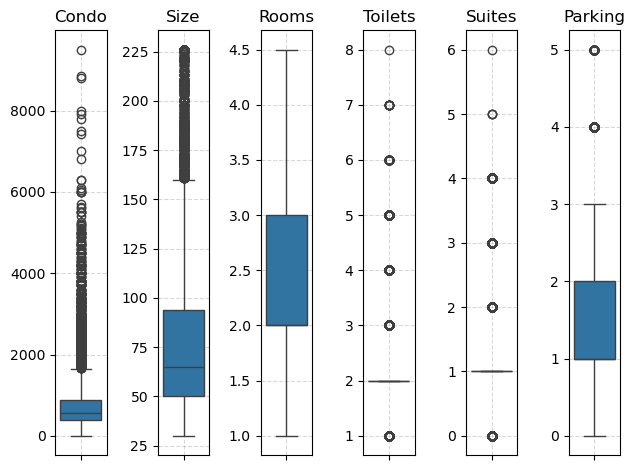

In [58]:
# box plot
plot_boxplot(X_train,X_num)

In [59]:
# cek deskriptif
num_desc = check_deskriptif(X_train,X_num)

# cek skewness
num_desc[['skewness','jenis_skewness']]

,skewness,jenis_skewness
Condo,3.505451,skewed
Size,1.674205,skewed
Rooms,0.230652,normal
Toilets,1.594305,skewed
Suites,1.469252,skewed
Parking,1.664504,skewed


Setelah dilakukan capping persentase outlier pada Size, Rooms, dan Parking sudah mendekati 0, walaupun distribusinya masih skew ke kanan.

In [60]:
# save game
X_train_cap = X_train.copy()
X_test_cap  = X_test.copy()
y_test_cap  = y_test.copy()
y_train_cap = y_train.copy()

In [61]:
# Load game
X_train = X_train_cap.copy()
X_test  = X_test_cap.copy()
y_test  = y_test_cap.copy()
y_train = y_train_cap.copy()

## Feature Selection

Berdasarkan uji korelasi antara target dan fitur-fitur, didapatkan bahwa seluruh fitur memilki korelasi dengan target. Namun, Longitude, Latitude dan District yang nilainya sudah terwakilkan oleh Zone tidak akan digunakan dalam pemodelan.

In [62]:
# define column that will be dropped
dropped = ['Longitude', 'Latitude', 'District']

# drop from train
X_train.drop(columns=dropped,inplace=True)

# drop from test
X_test.drop(columns=dropped,inplace=True)

# drop distribusi normal
for i in dropped:
    # drop
    X_cat.remove(i)

# check
print('cat: ',X_cat)
print('num: ',X_num)

cat:  ['Elevator', 'Furnished', 'Swimming Pool', 'New', 'Negotiation Type', 'Zone']
num:  ['Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking']


Tersisa 12 kolom setelah penghapusan Longitude, Latitude dan District

In [63]:
# save train & test
X_train_FS_2 = X_train.copy()
X_test_FS_2  = X_test.copy()
y_test_FS_2  = y_test.copy()
y_train_FS_2 = y_train.copy()

In [64]:
# Load
X_train = X_train_FS_2.copy()
X_test  = X_test_FS_2.copy()
y_test  = y_test_FS_2.copy()
y_train = y_train_FS_2.copy()

## Column Transformer

- Pada fitur-fitur numerik, untuk menyamakan skala data agar mesin tidak menilai satu kolom lebih tinggi dari kolom lainnya, perlu dilakukan scaling. Karena Distribusinya kebanyakan adalah skew, penggunaan scaling dengan minmax yang tidak menggunakan rata-rata dalam perhitungannya.
- Untuk fitur-fitur kategorik, perlu diubah dalam bentuk angka karena komputer hanya bisa membaca angka.

Kedua hal diatas akan disatukan dalam column transformer yang kemudian akan dihubungkan dengan model menggunakan pipeline.

In [65]:
# assign column sesuai perlakuan
# one-hot kolom
ohe_col = ['Negotiation Type', 'Zone']

# scaling kolom
scale_col = X_num.copy()

# encoded columns
encoded = X_cat.copy()

# drop unencoded columns
for o in ohe_col:
    # remove
    encoded.remove(o)

# pipeline one-hot
ohe_pipeline = Pipeline([
    ('oh_enc',OneHotEncoder(sparse_output=False,handle_unknown="ignore"))
])

# pipeline num
pipe_num = Pipeline([
    ('minmax_scaler', MinMaxScaler())
])

# Transformer Column
ct_prep = ColumnTransformer([
    ('numeric', pipe_num, scale_col),
    ('oh_encode',ohe_pipeline, ohe_col),
    ('encoded','passthrough',encoded)
])

# check transformer columns
ct_prep

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('minmax_scaler',
                                                  MinMaxScaler())]),
                                 ['Condo', 'Size', 'Rooms', 'Toilets', 'Suites',
                                  'Parking']),
                                ('oh_encode',
                                 Pipeline(steps=[('oh_enc',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Negotiation Type', 'Zone']),
                                ('encoded', 'passthrough',
                                 ['Elevator', 'Furnished', 'Swimming Pool',
                                  'New'])])

Column transformer telah terbentuk dimana fitur numerik akan melewati scaling dan kategorik akan melewati encoding. Sedangkan untuk kolom-kolom yang telah di-encode ('Elevator', 'Furnished', 'Swimming Pool', 'New') tidak akan melalui apapun.

# Model Definition

## Evaluasi Metric

Evaluasi metrics yang digunakan adalah RMSE. Hal tersebut dikarenakan yang akan diprediksi adalah uang, dimana perbedaan atau kesalahan sekecil apapun sangat berharga. Metrik evaluasi yang dapat menangkap kesalahan atau perbedaan sekecil apapun adalah RMSE. Perhitungan RMSE yang mengkuadratkan error menyebabkan dirinya sangat sensitif terhadap perubahan.

## KNN

K-Nearest Neighbor (KNN) adalah algoritma yang bersifat non-parametrik dimana algoritma tidak membutuhkan asumsi apapun dan lazy learning dimana algoritma tidak tidak melalui fase training (Semua data training digunakan pada tahap testing).

KNN adalah algoritma yang bekerja dengan cara mengukur jarak setiap titik baru dengan semua titik dalam data training. Kemudian model akan mengidentifikasi beberapa tetangga terdekat (Nilai K) dengan data baru dan menghitung rata-ratanya. Rata-rata tersebut yang akan menjadi prediksi nilai untuk data baru.

|Kelebihan|Kekurangan|
|-----|----|
|Sederhana|Cost mahal|
|non-parametrik|Sensitif terhadap noise|
|fleksibel|membutuhkan skala yang sama|
|Dapat menangani hubungan non-linear|Kurang cocok untuk data high dimensional data|

([LP2M Universitas Medan Area](https://lp2m.uma.ac.id/2023/02/16/algoritma-k-nearest-neighbors-knn-pengertian-dan-penerapan/))

KNN dipilih dalam modeling kali ini dikarenakan kesederhanaannya dan kemampuannya untuk menangani hubungan non-linear.

In [66]:
# pipeline model
pipe_knn = Pipeline([
    ('prep', ct_prep),
    ('model', KNeighborsRegressor())
])

# cek
pipe_knn

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['Condo', 'Size', 'Rooms',
                                                   'Toilets', 'Suites',
                                                   'Parking']),
                                                 ('oh_encode',
                                                  Pipeline(steps=[('oh_enc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Negotiation Type', 'Zone']),
                                                 ('encoded', 'passthrough',
                                                  ['Elevator', 'Furnished',
                                                   'Swimming Pool', 'New'])])),
                ('model', KNeighborsRegressor())])

## SVM

Support Vector Regressor (SVR) adalah penerapan Support Vector Machine (SVM) untuk kasus regresi dan algoritma ini juga bersifat non-parametrik.

SVR bekerja dengan cara mencoba menemukan hyperplane yang dapat memprediksi nilai target dengan memaksimalkan margin dan menciptakan epsilon sebagai toleransi kesalahan prediksi.

|Kelebihan|Kekurangan|
|-----|----|
|Robust Overfit|Tidak cocok untuk data besar|
|Kemampuan generalisasi yang baik|tidak cocok untuk high dimensional data|
|fleksibel (banyak pilihan kernel)|komputasi lama|
|Robust outlier||

([Isnaeni, Sudarmin, Rais (2022)](https://jurnalvariansi.unm.ac.id/index.php/variansi/article/download/13/4#:~:text=SVR%20merupakan%20pengembangan%20SVM%20untuk,Smola%20%26%20Sch%2C%202004))

SVM dipilih karena dapat bekerja baik pada data non-linear, terutama dengan kernel 'RBF' nya

In [67]:
# pipeline model
pipe_svr = Pipeline([
    ('prep', ct_prep),
    ('model', SVR())
])

# cek
pipe_svr

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['Condo', 'Size', 'Rooms',
                                                   'Toilets', 'Suites',
                                                   'Parking']),
                                                 ('oh_encode',
                                                  Pipeline(steps=[('oh_enc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Negotiation Type', 'Zone']),
                                                 ('encoded', 'passthrough',
                                                  ['Elevator', 'Furnished',
                                                   'Swimming Pool', 'New'])])),
                ('model', SVR())])

## Decision Tree

Decision Tree adalah algoritma yang menggunakan pohon keputusan untuk memprediksi nilai kontinu.

Decision Tree bekerja dengan memecah data menjadi subset yang lebih kecil berdasarkan fitur, dan hasilnya adalah pohon dengan decision node dan leaf node.

|Kelebihan|Kekurangan|
|-----|----|
|Mudah dipahami|Cenderung overfit
|Non-parametrik|Sensitive terhadap perubahan
|Dapat menangani hubungan non-linear|tidak cocok untuk dataset besar

([Algoritma Machine Learning](https://blog.algorit.ma/decision-tree/))

Decision Tree dipilih karena dapat menangani data non-linear, tidak membutuhkan asumsi dan mudah dipahami.

In [68]:
# pipeline model
pipe_dt = Pipeline([
    ('prep', ct_prep),
    ('model', DecisionTreeRegressor(random_state=42))
])

# cek
pipe_dt

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['Condo', 'Size', 'Rooms',
                                                   'Toilets', 'Suites',
                                                   'Parking']),
                                                 ('oh_encode',
                                                  Pipeline(steps=[('oh_enc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Negotiation Type', 'Zone']),
                                                 ('encoded', 'passthrough',
                                                  ['Elevator', 'Furnished',
                                                   'Swimming Pool', 'New'])])),
                ('model', DecisionTreeRegressor(random_state=42))])

## Random Forest 

Random Forest Regression adalah algoritma ensemble learning yang menggunakan sejumlah besar pohon keputusan (decision trees) untuk memprediksi nilai kontinu.

Random Forest menggabungkan prediksi dari banyak pohon keputusan untuk mendapatkan hasil yang lebih akurat dan stabil.

|Kelebihan|Kekurangan|
|-----|----|
|Robust Outlier|Cenderung bias pada kategorikal
|dapat menangani data non-linear|komputasi lama
|cocok untuk data besar|tidak cocok untuk metode linear dengan banyak fitur
|mengurangi overfit||

([Trivusi](https://www.trivusi.web.id/2022/08/algoritma-random-forest.html))

Random Forest dipilih karena dapat meningkatkan performa dengan mengurangi overfitting pada data latih dan mampu menangkap hubungan kompleks antar fitur.

In [69]:
# pipeline model
pipe_rf = Pipeline([
    ('prep', ct_prep),
    ('model', RandomForestRegressor(random_state=42))
])

# cek
pipe_rf

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['Condo', 'Size', 'Rooms',
                                                   'Toilets', 'Suites',
                                                   'Parking']),
                                                 ('oh_encode',
                                                  Pipeline(steps=[('oh_enc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Negotiation Type', 'Zone']),
                                                 ('encoded', 'passthrough',
                                                  ['Elevator', 'Furnished',
                                                   'Swimming Pool', 'New'])])),
                ('model', RandomForestRegressor(random_state=42))])

## Ada Boost

Ada Boost Regressor adalah algoritma ensemble learning yang meningkatkan akurasi model prediksi dengan menggabungkan beberapa model regresi sederhana menjadi satu model kuat.

AdaBoost bekerja dengan melatih sejumlah model dasar secara berturut-turut, di mana setiap model baru difokuskan untuk memperbaiki kesalahan dari model sebelumnya. Algoritma memberikan bobot lebih besar pada data yang sulit diprediksi dan menggabungkan prediksi semua model dasar dengan bobot sesuai akurasi masing-masing untuk membuat prediksi akhir yang lebih kuat dan akurat.

|Kelebihan|Kekurangan|
|-----|----|
|Fleksibel| Sensitive outlier
|Feature selection otomatis (memberi bobot lebih pada fitur yang ebih berpengaruh pada prediksi)| Komputasi lama
|Robust Overfit|

Ada Boost dipilih karena kemampuannya meningkatkan performa model dasar dengan pembobotan pada kesalahan di iterasi sebelumnya beserta dengan resiko overfit yang lebih rendah.

In [70]:
# pipeline model
pipe_ada = Pipeline([
    ('prep', ct_prep),
    ('model', AdaBoostRegressor(random_state=42))
])

# cek
pipe_ada

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['Condo', 'Size', 'Rooms',
                                                   'Toilets', 'Suites',
                                                   'Parking']),
                                                 ('oh_encode',
                                                  Pipeline(steps=[('oh_enc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Negotiation Type', 'Zone']),
                                                 ('encoded', 'passthrough',
                                                  ['Elevator', 'Furnished',
                                                   'Swimming Pool', 'New'])])),
                ('model', AdaBoostRegressor(random_state=42))])

# Model Training

Dalam pelatihan model, data yang digunakan adalah data sebelum tahap scaling dan encoding.

In [71]:
# Load
X_train = X_train_FS_2.copy()
X_test  = X_test_FS_2.copy()
y_test  = y_test_FS_2.copy()
y_train = y_train_FS_2.copy()

Tahap ini model akan dilatih dengan data training

In [72]:
# Training KNN
pipe_knn.fit(X_train, y_train)

# Training SVM
pipe_svr.fit(X_train, y_train)

# Training decision tree
pipe_dt.fit(X_train, y_train)

# Training Random Forest
pipe_rf.fit(X_train, y_train)

# Training Ada boost
pipe_ada.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['Condo', 'Size', 'Rooms',
                                                   'Toilets', 'Suites',
                                                   'Parking']),
                                                 ('oh_encode',
                                                  Pipeline(steps=[('oh_enc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Negotiation Type', 'Zone']),
                                                 ('encoded', 'passthrough',
                                                  ['Elevator', 'Furnished',
                                                   'Swimming Pool', 'New'])])),
                ('model', AdaBoostRegressor(random_state=42))])

Semua model telah berhasil melewati tahap pelatihan.

# Model Evaluation

Untuk memastikan kestabilan model, dilakukan cross-validation untuk melihat rata-rata performa dan standar deviasinya.

In [73]:
# crossval knn
knn_train_cross_val = cross_val_score(pipe_knn,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="neg_root_mean_squared_error")

# Konversi nilai negatif menjadi positif (karena neg_mean_absolute_error memberikan nilai negatif)
rmse_knn_cv = np.abs(knn_train_cross_val)

# predict knn
y_pred_train_knn = pipe_knn.predict(X_train)
y_pred_test_knn = pipe_knn.predict(X_test)

# crossval svm
svm_train_cross_val = cross_val_score(pipe_svr,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="neg_root_mean_squared_error")

# Konversi nilai negatif menjadi positif (karena neg_mean_absolute_error memberikan nilai negatif)
rmse_svm_cv = np.abs(svm_train_cross_val)

# predict svm
y_pred_train_svm = pipe_svr.predict(X_train)
y_pred_test_svm = pipe_svr.predict(X_test)

# crossval dt
dt_train_cross_val = cross_val_score(pipe_dt,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="neg_root_mean_squared_error")

# Konversi nilai negatif menjadi positif (karena neg_mean_absolute_error memberikan nilai negatif)
rmse_dt_cv = np.abs(dt_train_cross_val)

# predict dt
y_pred_train_dt = pipe_dt.predict(X_train)
y_pred_test_dt = pipe_dt.predict(X_test)

# crossval rf
rf_train_cross_val = cross_val_score(pipe_rf,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="neg_root_mean_squared_error")

# Konversi nilai negatif menjadi positif (karena neg_mean_absolute_error memberikan nilai negatif)
rmse_rf_cv = np.abs(rf_train_cross_val)

# predict rf
y_pred_train_rf = pipe_rf.predict(X_train)
y_pred_test_rf = pipe_rf.predict(X_test)

# crossval ada boost
ada_train_cross_val = cross_val_score(pipe_ada,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="neg_root_mean_squared_error")

# Konversi nilai negatif menjadi positif (karena neg_mean_absolute_error memberikan nilai negatif)
rmse_ada_cv = np.abs(ada_train_cross_val)

# predict ada boost
y_pred_train_ada = pipe_ada.predict(X_train)
y_pred_test_ada = pipe_ada.predict(X_test)

# define untuk menyimpan report
all_reports = {}

# knn report
all_reports = performance_report(all_reports,rmse_knn_cv, y_train, y_pred_train_knn, y_test, y_pred_test_knn, 'KNN Baseline (Default Hyperparameter)')
# svm report
all_reports = performance_report(all_reports,rmse_svm_cv, y_train, y_pred_train_svm, y_test, y_pred_test_svm, 'SVR Baseline (Default Hyperparameter)')
# dt report
all_reports = performance_report(all_reports,rmse_dt_cv, y_train, y_pred_train_dt, y_test, y_pred_test_dt, 'DT Baseline (Default Hyperparameter)')
# rf report
all_reports = performance_report(all_reports,rmse_rf_cv, y_train, y_pred_train_rf, y_test, y_pred_test_rf, 'RF Baseline (Default Hyperparameter)')
# rf report
all_reports = performance_report(all_reports,rmse_ada_cv, y_train, y_pred_train_ada, y_test, y_pred_test_ada, 'ADA Baseline (Default Hyperparameter)')

# to df
report = pd.DataFrame(all_reports)

# show
report

,KNN Baseline (Default Hyperparameter),SVR Baseline (Default Hyperparameter),DT Baseline (Default Hyperparameter),RF Baseline (Default Hyperparameter),ADA Baseline (Default Hyperparameter)
train,195406.149433,654740.345281,20467.898173,75788.916633,272984.144159
mean - cv,259127.732545,654781.364584,289963.371832,209564.243652,285728.553610
std - cv,9140.784882,18086.409787,27401.830500,12313.105023,8453.483021
test,272051.059165,642174.844672,294264.748517,227238.594158,296351.548613


Dari hasil uji cross-validation, Ada boost adalah model baseline terbaik karena:
- memiliki standar deviasi terendah dari yang lainnya yang menandakan model lebih stabil daripada yang lain.
- Selisih yang kecil antara RMSE rata-rata cross validation dan test.

Walau begitu seluruh baseline model dapat dikatakan underfit karena error yang sangat tinggi.

# Hyperparameter Tuning Ada Boost

Tuning pada best baseline dilakukan dengan harapan model mencapai goodfit.

In [74]:
# show pipeline's parameter
pipe_ada.get_params()

{'memory': None,
 'steps': [('prep', ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('minmax_scaler',
                                                     MinMaxScaler())]),
                                    ['Condo', 'Size', 'Rooms', 'Toilets', 'Suites',
                                     'Parking']),
                                   ('oh_encode',
                                    Pipeline(steps=[('oh_enc',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
                                    ['Negotiation Type', 'Zone']),
                                   ('encoded', 'passthrough',
                                    ['Elevator', 'Furnished', 'Swimming Pool',
                                     'New'])])),
  ('model', AdaBoostRegressor(random_state=42))],
 'verbose': False,
 'prep': ColumnTransf

In [75]:
# Parameter grid untuk RandomizedSearchCV
param_distributions = {
    'model__n_estimators': np.arange(10, 300, 10),
    'model__learning_rate': np.linspace(0.001, 2, 10),
    'model__loss': ['linear', 'square', 'exponential'],
    'model__estimator': [
        DecisionTreeRegressor(
            max_depth=d,              
            min_samples_split=split,  
            min_samples_leaf=leaf,       
            max_leaf_nodes=leaf_nodes     
        ) 
        for d in range(1, 11)           
        for split in [2, 5, 10]         
        for leaf in [1, 5, 10]            
        for leaf_nodes in [10, 20, 50]    
    ]
}


# param_distributions = {
#     'model__n_estimators': np.arange(50, 501, 50),
#     'model__learning_rate': np.linspace(0.01, 2, 10),
#     'model__loss': ['linear', 'square', 'exponential'],
#     'model__estimator': [DecisionTreeRegressor(max_depth=d) for d in range(1, 11)]
# }

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipe_ada,
    param_distributions=param_distributions,
    n_iter=50,
    scoring='neg_root_mean_squared_error',
    cv=3,
    random_state=42,
    n_jobs=-1 
)

# Melakukan RandomizedSearchCV
random_search.fit(X_train, y_train)

# Menampilkan hasil terbaik
print("Best Parameters:", random_search.best_params_)
print("Best Score (Negative RMSE):", random_search.best_score_)

# Menggunakan model terbaik
best_model = random_search.best_estimator_

Best Parameters: {'model__n_estimators': 140, 'model__loss': 'exponential', 'model__learning_rate': 0.22311111111111112, 'model__estimator': DecisionTreeRegressor(max_depth=6, max_leaf_nodes=50, min_samples_leaf=5)}
Best Score (Negative RMSE): -220767.3921477544


In [76]:
# Prediksi menggunakan model terbaik
y_pred_ada_train = best_model.predict(X_train)
y_pred_ada_test = best_model.predict(X_test)

# Evaluasi performa
rmse_train = root_mean_squared_error(y_train, y_pred_ada_train)
rmse_test = root_mean_squared_error(y_test, y_pred_ada_test)

print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)
print("RMSE Gap:", abs(rmse_train - rmse_test))

Train RMSE: 147403.67522613893
Test RMSE: 248103.72578544696
RMSE Gap: 100700.05055930803


In [77]:
# baseline report
report[['ADA Baseline (Default Hyperparameter)']]

,ADA Baseline (Default Hyperparameter)
train,272984.144159
mean - cv,285728.553610
std - cv,8453.483021
test,296351.548613


Hasil Hyperparameter tuning menunjukkan bahwa performa test dan train meningkat, namun model masih menunjukkan underfit karena error yang masih terbilang besar untuk harga sebuah properti. saran untuk pengembang salnjutnya adalah gunakan model yang lebih simple.

Model dapat memprediksi harga apartemen dengan error mencapai 296.351 BRL. contohnya ketika harga apartemen 1500000 BRL model dapat memprediksi dengan rentang 1499703.649 sampai 1500296.351.

# Model Saving

In [78]:
# save model
with open('model.pkl','wb') as file_1:
    pickle.dump(best_model, file_1)

# Kesimpulan

## Kesimpulan

Market properti São Paulo menunjukkan dua segmen utama: pasar jual yang didominasi properti high-end dengan variasi harga besar, dan pasar sewa yang lebih terjangkau dan kompetitif. 

Lokasi strategis seperti South Central São Paulo, khususnya distrik Itaim Bibi dan Jardim Paulista, menjadi pusat properti premium, sedangkan daerah seperti Northeast São Paulo lebih cocok untuk pengembangan properti ekonomis. 

Fasilitas modern seperti elevator, furnitur, dan suite memengaruhi harga secara signifikan, sementara apartemen baru tidak menunjukkan perbedaan harga yang mencolok dibandingkan apartemen lama.

## Saran

- Fokus Investasi: Fokuskan investasi pada wilayah South Central São Paulo untuk mengembangkan apartemen dengan fasilitas premium. Permintaan tinggi di area ini dapat memberikan margin keuntungan yang besar.
- Pengembangan di Northeast São Paulo: Area ini dapat menjadi target untuk apartemen dengan harga terjangkau, mengingat rendahnya aktivitas pasar dan potensi menarik kelompok pembeli baru.
- properti ekonomis tanpa furnitur di pinggiran kota dapat memenuhi kebutuhan penyewa dari segmen menengah-bawah. Optimalisasi lokasi, diferensiasi fasilitas, dan strategi pemasaran berbasis data dapat membantu memaksimalkan potensi pasar properti di São Paulo.
